# PREDICTING DRUG TREATMENT PROGRAM ADHERENCE

<br />

![caption](./pills-858180_1920.jpg)

**Harvard CS109 Final Project - December 2015**
<br />
<br />
*Analysis by Taylor Names*

# TABLE OF CONTENTS




[1. INTRODUCTION](#1.-INTRODUCTION)

- [1.1 BACKGROUND AND MOTIVATION](#1.1-BACKGROUND-AND-MOTIVATION)
- [1.2 DATA SOURCE](#1.2-DATA-SOURCE)
- [1.3 PROJECT OBJECTIVES](#1.3-PROJECT-OBJECTIVES)
- [1.4 ANALYSIS METHODOLOGY](#1.4-ANALYSIS-METHODOLOGY)

[2. THE DATA](#2.-THE-DATA)

- [2.1 FEATURES AND RESPONSE VARIABLE](#2.1-FEATURES-AND-RESPONSE-VARIABLE)
    - [2.1.1 ORIGINAL RESPONSE VARIABLE](#2.1.1-ORIGINAL-RESPONSE-VARIABLE)
    - [2.1.2 ADAPTATION OF RESPONSE VARIABLE](#2.1.2-ADAPTATION-OF-RESPONSE-VARIABLE)
- [2.2 DATA SUMMARY](#2.2-DATA-SUMMARY)
- [2.3 DATA MUNGING AND MISSING VALUE IMPUTATION](#2.3-DATA MUNGING-AND-MISSING-VALUE-IMPUTATION)
- [2.3.1 IMPUTATION OF MISSING DATA USING RANDOM FOREST CLASSIFIER](#2.3.1-IMPUTATION-OF-MISSING-DATA-USING-RANDOM-FOREST-CLASSIFIER)
- [2.4 SCRAPING](#2.4-SCRAPING)

[3. EXPLORATORY DATA ANALYSIS](#3.-EXPLORATORY-DATA-ANALYSIS)

- [3.1 CATEGORICAL DISTRIBUTIONS FOR EACH FEATURE](#3.1-CATEGORICAL-DISTRIBUTIONS-FOR-EACH-FEATURE)
- [3.2 ADHERENCE PROPORTION FOR EACH CATEGORY BY FEATURE](#3.2-ADHERENCE-PROPORTION-FOR EACH-CATEGORY-BY-FEATURE)
- [3.3 EXPLORATION OF THE EFFECT OF GEOGRAPHY ON ADHERENCE RATE](#3.3-EXPLORATION-OF-THE-EFFECT-OF-GEOGRAPHY-ON- ADHERENCE-RATE)
- [3.4 FEATURE SELECTION: VARIABLE INTERACTIONS AND BAYESIAN INFERENCE](#3.4-FEATURE-SELECTION:-VARIABLE- INTERACTIONS-AND-BAYESIAN-INFERENCE)

[4. PREDICTION](#4.-PREDICTION)

- [4.1 BASELINE MODELS AND SCORING METHODS](#4.1-BASELINE-MODELS-AND-SCORING-METHODS)
- [4.2 RANDOM FOREST](#4.2-RANDOM-FOREST)
    - [4.2.1 TRAINING](#4.2.1-TRAINING)
    - [4.2.2 PERFORMANCE](#4.2.2-PERFORMANCE)
    - [4.2.3 CALIBRATION](#4.2.3-CALIBRATION)
    - [4.2.4 CALIBRATED MODEL PERFORMANCE](#4.2.4-CALIBRATED-MODEL-PERFORMANCE)
- [4.3 REGULARIZED 'ELASTIC NET' LOGISTIC REGRESSION](#4.3-REGULARIZED-'ELASTIC NET'-LOGISTIC-REGRESSION)
    - [4.3.1 DATA PREPARATION](#4.3.1-DATA-PREPARATION)
    - [4.3.2 OPTIMIZATION METHOD - STOCHASTIC GRADIENT DESCENT](#4.3.2-OPTIMIZATION-METHOD---STOCHASTIC-GRADIENT-DESCENT)
    - [4.3.3 TRAINING](#4.3.3-TRAINING)
    - [4.3.4 PERFORMANCE](#4.3.4-PERFORMANCE)
    - [4.3.5 CALIBRATION](#4.3.5-CALIBRATION)
    - [4.3.6 CALIBRATED MODEL PERFORMANCE](#4.3.6-CALIBRATED-MODEL-PERFORMANCE)
- [4.4 GRADIENT BOOSTED TREE CLASSIFIER](#4.4-GRADIENT-BOOSTED-TREE-CLASSIFIER)
    - [4.4.1 TRAINING](#4.4.1-TRAINING)
    - [4.4.2 PERFORMANCE](#4.4.2-PERFORMANCE)
    - [4.4.3 CALIBRATION](#4.4.3-CALIBRATION)
    - [4.4.4 CALIBRATED MODEL PERFORMANCE](#4.4.4-CALIBRATED-MODEL-PERFORMANCE)
- [4.5 ENSEMBLE](#4.5-ENSEMBLE)
    - [4.5.1 MODEL CORRELATIONS](#4.5.1-MODEL-CORRELATIONS)
    - [4.5.2 TRAINING](#4.5.2-TRAINING)
    - [4.5.3 PERFORMANCE](#4.5.3-PERFORMANCE)
    
[5. CONCLUSIONS AND FURTHER RESEARCH](#5.-CONCLUSIONS-AND-FURTHER-RESEARCH)


# 1. INTRODUCTION

## 1.1 BACKGROUND AND MOTIVATION

How to treat drug users is a controversial and timely issue currently in the United States. In the last 15 or so years, an increasing amount of convicted drug users have been given the option (or have been required) to complete a drug treatment program instead of serving time in prison. Completing treatment instead of spending time in jail have many psychological, financial, health and social benefits. 

Many questions surround the current state of drug treatment: 

- **Are these programs helping drug users return to productive lives?** 
- **Who is likely to succeed and complete these programs and who isn't? **
- **What type of treatment is right for a specific individual and will they adhere to program guidelines?**
- **Are there certain demographic groups for whom drug treatment is not working?**

Having data driven insights to help answer these questions can have many practical benefits:

- More efficient use of public and private financial resources
- Individually tailored treatment programs to increase probability of successful treatment
- Identification of high risk individuals
- Identification of high performing state drug treatment programs

Besides the possible practical benefits of the analysis of the dataset, the size and scope of dataset present many interesting computational challenges.

## 1.2 DATA SOURCE

The data includes demographic, geographic, education and employment, drug use history, and treatment program outcome information for approximately 9.8 million treatment episodes between the years 2006 and 2011. The data does not contain information relating to drug use relapse after the termination of the treatment episode.

The data is made public by the Substance Abuse & Mental Health Services Administration (SAMHSA) and the data is hosted by the Inter-university Consortium for Political and Social Research (ICPSR) at this [website.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/30122) The data consists of 65 features, most of which are  entirely categorical. The specifics relating to the data are described in greater detail in the section on exploratory data analysis. The specific data utilized for this analysis in .tsv format can be downloaded from this [link.](https://www.dropbox.com/s/s82zljp2ceaxvaz/DRUG_TREATMENT_DATA.zip?dl=0)

## 1.3 PROJECT OBJECTIVES

**PRACTICAL OBJECTIVES**
- Predict whether new drug treatment episode will conclude positively
- Predict the probability of positive conclusion of a new treatment episode
- Understand the drivers of successful drug treatment
- Identify profiles of drug users particularly vulnerable to non-completion of treatment
- Distinguish between state treatment program adherence rates

Hypothetically, with this tool, a drug treatment program administrator could identify the different probabilities of completion of a variety of treatment programs for a given individual and, in turn, make an informed decision that could lead to more efficient use of resources.

**COMPUTATIONAL OBJECTIVES**
- Determine which machine learning algorithm(s) are most suited to this dataset and objective
- Determine the best evaluation method for model predictions
- Formulate baseline predictions to compare to model predictions
- Explore variable importances and incorporate findings into model(s)
- Identify limitations of final model and analysis


## 1.4 ANALYSIS METHODOLOGY



**Data Munging**
1. Defining form of reponse variable
2. Elimination of not applicable features
3. Dealing with missing values
    - Dropping specific participant records
    - 'Most Frequent' value imputation
    - Imputation of missing values using random forests
4. Web scraping for descriptions of categorical values


**Feature Engineering and Exploratory Data Analysis**
1. Singular variable importances through visual analysis
2. Binary variable interactions
    - 'Regularization' of interaction terms using Bayesian inference

**Prediction**
1. Random forest classifier and isotonic calibration
2. 'Elastic Net' logistic regression with stochastic gradient descent and isotonic calibration
3. Gradient boosted trees classifier and isotonic calibration

**Ensembling**
1. Fit unregularized logistic regression model to three models
2. Make final predictions, evaluate results



# 2. THE DATA

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import pickle
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams
rcParams['grid.color']="0.9"   
rcParams['grid.linestyle']="-" 
rcParams['grid.linewidth'] = 1
rcParams['grid.alpha']=1

import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("tempdata/30122-0001-Data.tsv", sep='\t')

## 2.1 FEATURES AND RESPONSE VARIABLE

The dataset includes the following characteristics (will also be referred to as features) for each drug treatment program participant. The name of the variable is followed by the description of the variable:

- `CASEID: CASE IDENTIFICATION NUMBER`
- `DISYR: YEAR OF DISCHARGE`
- `AGE: AGE (RECODED)`
- `GENDER: SEX`
- `RACE: RACE`
- `ETHNIC: ETHNICITY (HISPANIC ORIGIN)`
- `MARSTAT: MARITAL STATUS`
- `EDUC: EDUCATION`
- `EMPLOY: EMPLOYMENT STATUS`
- `DETNLF: DETAILED 'NOT IN LABOR FORCE' CATEGORY`
- `PREG: PREGNANT AT TIME OF ADMISSION`
- `VET: VETERAN STATUS`
- `LIVARAG: LIVING ARRANGEMENTS`
- `PRIMINC: SOURCE OF INCOME/SUPPORT`
- `ARRESTS: NUMBER OF ARRESTS IN 30 DAYS PRIOR TO ADMISSION`
- `STFIPS: CENSUS STATE FIPS CODE`
- `CBSA: FIPS 2000 CBSA CODE`
- `PMSA: FIPS 1990 MSA CODE`
- `REGION: CENSUS REGION`
- `DIVISION: CENSUS DIVISION`
- `SERVSETD: SERVICE SETTING AT DISCHARGE`
- `METHUSE: MEDICATION-ASSISTED OPIOID THERAPY`
- `DAYWAIT: DAYS WAITING TO ENTER TREATMENT`
- `REASON: REASON FOR DISCHARGE`
- `LOS: LENGTH OF STAY`
- `PSOURCE: PRINCIPAL SOURCE OF REFERRAL`
- `DETCRIM: DETAILED CRIMINAL JUSTICE REFERRAL`
- `NOPRIOR: NUMBER OF PRIOR TREATMENT EPISODES`
- `SUB1: SUBSTANCE PROBLEM CODE (PRIMARY)`
- `ROUTE1: USUAL ROUTE OF ADMINISTRATION (PRIMARY)`
- `FREQ1: FREQUENCY OF USE (PRIMARY)`
- `FRSTUSE1: AGE AT FIRST USE (PRIMARY)`
- `SUB2: SUBSTANCE PROBLEM CODE (SECONDARY)`
- `ROUTE2: USUAL ROUTE OF ADMINISTRATION (SECONDARY)`
- `FREQ2: FREQUENCY OF USE (SECONDARY)`
- `FRSTUSE2: AGE AT FIRST USE (SECONDARY)`
- `SUB3: SUBSTANCE PROBLEM CODE (TERTIARY)`
- `ROUTE3: USUAL ROUTE OF ADMINISTRATION (TERTIARY)`
- `FREQ3: FREQUENCY OF USE (TERTIARY)`
- `FRSTUSE3: AGE AT FIRST USE (TERTIARY)`
- `NUMSUBS: NUMBER OF SUBSTANCES REPORTED AT ADM.`
- `IDU: CURRENT IV DRUG USE REPORTED AT ADM.`
- `ALCFLG` and 17 other Indicator variables for individual drug types
- `ALCDRUG: SUBSTANCE ABUSE TYPE`
- `DSMCRIT: DSM DIAGNOSIS`
- `PSYPROB: PSYCHIATRIC PROBLEM IN ADDITION TO ALCOHOL/DRUG PROBLEM`
- `HLTHINS: HEALTH INSURANCE`
- `PRIMPAY: EXPECTED/ACTUAL PRIMARY SOURCE OF PAYMENT`

Each feature is made up of numerous numerically encoded categories. More details about the individual category descriptions for each feature is available on the dataset [codebook.](http://wwwdasis.samhsa.gov/dasis2/TEDS%20Pubs/TEDS/Discharges/TED-D-Concatenated%202006%20to%202011/30122-0001-Codebook.pdf)


### 2.1.1 ORIGINAL RESPONSE VARIABLE

The original variable describing the outcome of the treatment episode consists of 8 separate categories. Below are the descriptions of the variable and the individual categories as well as the numerical encoding for each category:

`REASON`: Reason for discharge: Indicates the outcome of treatment or the reason for transfer or discontinuance of treatment.

- **TREATMENT COMPLETED (1)**: All parts of the treatment plan or program were completed.

- **LEFT AGAINST PROFESSIONAL ADVICE (2)**: Client chose not to complete program, with or without specific advice to continue treatment. Includes clients who "drop out" of treatment for unknown reason and clients who have not received treatment for some time and are discharged for "administrative" reasons.

- **TERMINATED BY FACILITY (3)**: Treatment terminated by action of facility, generally because of client non-compliance or violation of rules, laws, or procedures (not because client dropped out of treatment, client incarcerated, or other client motivated reason).

- **TRANSFERRED TO ANOTHER SUBSTANCE ABUSE TREATMENT PROGRAM OR FACILITY (4)**: Client was transferred to another substance abuse treatment program, provider or facility within an episode of treatment. 

- **INCARCERATED (5)**: This code is to be used for all clients whose course of treatment is terminated because the client has been incarcerated. Includes jail, prison, and house confinement.

- **DEATH (6)**

- **OTHER (7)**: Moved, illness, hospitalization, or other reason somewhat out of client's control.

- **UNKNOWN (8)**: Client status at discharge is not known because for example, discharge record is lost or incomplete.

### 2.1.2 ADAPTATION OF RESPONSE VARIABLE

For the purposes of this project and ease of interpretability of final predictions, the outcome (reponse) variable is reduced a binary outcome:

- **INCOMPLETE/DIDN'T ADHERE (0)**: Left against professional advice, terminated by facility, incarcerated

- **COMPLETED/ADHERED (1)**: Treatment completed, transferred to another substance abuse treatment program or facility

Participants who were transferred to another program were included with participants who completed treatment because as defined by SAMHSA, **being transferred represents a positive conclusion to a treatment episode** and only participants who are adhering to the program requirements are considered for transfer.

>Because both treatment completion and transfer to further treatment represent positive conclusions
to a treatment episode or component of a treatment episode, their rates are combined in some of
the analyses. ([Source](http://www.samhsa.gov/data/sites/default/files/TEDS2011D_Web/TEDS2011D_Web/Web/TEDS2011DChap1.htm))

Outcomes that were out of the participants control (as well as very rare) such as **death, other,** and **unknown** were **not included in the analysis**. Due to the lack of control of the participant and outcome rarity, we are confident that the elimination of these values does not introduce sampling bias into the data set.

## 2.2 DATA SUMMARY

In [3]:
df.head()

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,20060000001,2006,9,1,5,5,4,2,3,-9,-9,2,3,-9,-8,26,19820,2160,2,3,7,2,0,5,25,1,-9,1,2,1,3,3,4,2,5,3,1,-9,-9,-9,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,2,-9,-9
1,20060000002,2006,12,1,5,5,4,3,1,-9,-9,2,3,1,-8,29,-9,-9,2,4,2,2,-9,4,5,7,1,0,2,1,5,3,1,-9,-9,-9,1,-9,-9,-9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-9,2,4,5
2,20060000003,2006,7,2,5,5,-9,3,4,1,2,2,3,20,-8,27,-9,-9,2,4,6,2,-9,1,35,6,-9,-9,2,1,1,2,1,-9,-9,-9,1,-9,-9,-9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-9,-9,-9,-9
3,20060000004,2006,7,2,5,5,4,3,1,-9,2,2,2,1,-8,17,41180,7040,2,3,7,2,0,3,35,7,8,2,10,2,1,3,4,2,1,-9,1,-9,-9,-9,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,8,2,4,-9
4,20060000005,2006,9,1,4,5,1,2,4,6,-9,2,3,21,-8,19,19340,1960,2,4,4,2,0,1,17,7,-9,0,3,3,2,9,4,2,5,5,1,-9,-9,-9,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,-9,2,-9,5


In [4]:
df.shape

(9829536, 65)

In [5]:
df.describe()

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
count,9.829536e+06,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000
mean,2.008648e+10,2008.565576,7.385672,1.316786,6.243348,4.460965,-0.730916,2.589892,2.756016,-4.659835,-5.643938,0.389218,2.225300,4.357847,-3.050121,27.941288,23554.174972,3443.690643,2.418327,4.746925,5.348798,1.416218,-0.626684,2.235459,23.072387,3.823122,-5.502129,0.234684,4.027725,1.737084,2.956951,3.335691,2.901873,-2.767888,-2.356102,-1.941228,0.609988,-6.633109,-6.477751,-6.277725,1.777122,0.049891,0.605726,0.274713,0.379176,0.173801,0.006489,0.105621,0.004933,0.005908,0.113875,0.012404,0.001895,0.037699,0.001188,0.001829,0.007653,0.001858,0.002034,0.026273,2.151946,-3.341436,-1.299576,-3.721979,-4.759541
std,1.704791e+07,1.701035,2.539206,0.550357,5.244070,1.910116,4.683082,1.903108,1.993942,6.401648,5.051948,3.842441,1.891297,12.773499,4.046700,14.461250,16196.133161,2915.210062,1.171805,2.805823,2.062796,2.353995,31.729369,1.608214,13.392682,3.164659,5.910499,3.722664,2.899761,2.116117,2.374702,2.549466,3.518524,5.573713,5.946037,6.419153,4.899934,4.643156,4.840705,5.221006,0.790626,0.959833,0.488694,0.446370,0.485182,0.378938,0.080291,0.307352,0.070063,0.076639,0.317659,0.110681,0.043486,0.190467,0.034440,0.042730,0.087149,0.043070,0.045053,0.159947,0.794496,7.770911,4.831798,6.082950,6.443521
min,2.006000e+10,2006.000000,2.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.007095e+10,2007.000000,5.000000,1.000000,4.000000,5.000000,1.000000,2.000000,2.000000,-9.000000,-9.000000,2.000000,2.000000,-9.000000,-8.000000,17.000000,10780.000000,220.000000,1.000000,2.000000,4.000000,2.000000,-9.000000,1.000000,7.000000,1.000000,-9.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,2.009012e+10,2009.000000,7.000000,1.000000,5.000000,5.000000,1.000000,3.

## 2.3 DATA MUNGING AND MISSING VALUE IMPUTATION

In the data set, missing and not applicable values are denoted by a -9 or -8. A very simplistic technique to deal with missing values is to remove all samples with a missing value. Here, as a quick exercise, we eliminate all samples with a negative value in one of its columns.

In [6]:
small_df=df.copy()
for i in small_df.columns:
    small_df=small_df[small_df[i]>=0]    

In [7]:
small_df.shape

(2287, 65)

After dropping all rows with a missing value, we end up with only 2,287 samples. The sample is quite biased as all of the samples come from 2008 and are only female. As this method is not suitable for our purposes, we must deal with the missing values in a different way.

In [8]:
small_df.head(5)

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
3116475,20080000633,2008,3,2,5,5,1,2,4,2,2,2,2,21,0,17,14060,1040,2,3,4,2,72,1,33,7,3,2,4,2,4,2,2,1,2,2,12,2,5,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,2,4
3133109,20080017267,2008,7,2,2,5,1,3,4,1,2,2,2,21,0,17,16980,1600,2,3,7,2,30,2,34,7,3,3,2,1,1,3,3,3,1,4,4,2,1,4,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,2,2,4
3134727,20080018885,2008,3,2,5,5,1,1,4,6,2,2,2,1,0,17,14060,1040,2,3,4,2,0,2,13,7,3,0,4,2,5,1,2,1,2,2,12,2,5,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,2,4
3141417,20080025575,2008,3,2,5,5,1,2,4,2,2,2,2,3,0,17,41180,7040,2,3,7,2,10,2,33,7,5,0,2,1,2,3,4,2,3,3,12,2,5,3,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,1,1
3141427,20080025585,2008,8,2,5,5,1,3,4,1,2,2,2,21,0,17,16980,1600,2,3,7,2,11,4,34,7,3,1,2,1,2,3,3,3,2,7,4,2,2,3,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,1,2,4


#### ELIMINATION OF INCOMPLETE / REPETITIVE FEATURES

To help reduce the effect of missing data in the data set, we eliminated certain features for the following reasons:
- 'Future' value that would be unknown at start of treatment program (ie length of stay in program)
- Features that were only collected for a small portion of the participants (ie arrests in previous 30 days)
- Repetitive features that have information already contained in other features (ie alcohol flag)

In [24]:
drop_col=['ARRESTS','DAYWAIT','LOS','SUB3','ROUTE3','FREQ3','FRSTUSE3','ALCFLG','COKEFLG',
          'MARFLG','HERFLG','METHFLG','OPSYNFLG','PCPFLG','HALLFLG','MTHAMFLG','AMPHFLG',
          'STIMFLG','BENZFLG','TRNQFLG','BARBFLG','SEDHPFLG','INHFLG','OTCFLG','OTHERFLG']
df.drop(drop_col, axis=1, inplace=True)

#### ELIMINATION OF RECORDS WITH NO 'RESPONSE' VALUE OR RESULT OUT OF PARTICIPANT'S CONTROL

In [25]:
df=df[(df.REASON>0) & (df.REASON<6)]

Below, we create a new column `RESPONSE` to represent the binary response variable where:

- **1 Values:** Treatment completed and transfered to another substance abuse program or facility
- **0 Values:** Left against professional advice, terminated by facility, and incarcerated

In [26]:
df['RESPONSE']=[1 if (i==1) | (i==4) else 0 for i in df.REASON]

#### DEALING WITH 'NOT APPLICABLE' VALUES

In the original dataset, some features are dependent on others. Since these "missing" values are not missing completely at random, deleting them would introduce some bias into the dataset. For this reason, a new category is created for values that are not applicable.

In [27]:
df.reset_index(drop=True, inplace=True)
df['PREG']=[2 if df.GENDER[i]==1 else val for i,val in enumerate(df.PREG)]
#for clients in the labor force, create a new category for "in labor force" (7) 
#in the DETNLF instead of categorizing as missing
df['DETNLF']=[7 if df.EMPLOY[i]!=4 else val for i,val in enumerate(df.DETNLF)]

#modify category for values that are 'not applicable'
df['ROUTE1']=[21 if df.SUB1[i]==1 else val for i,val in enumerate(df.ROUTE1)]
df['FREQ1']=[6 if df.SUB1[i]==1 else val for i,val in enumerate(df.FREQ1)]
df['FRSTUSE1']=[13 if df.SUB1[i]==1 else val for i,val in enumerate(df.FRSTUSE1)]
df['ROUTE2']=[21 if df.SUB2[i]==1 else val for i,val in enumerate(df.ROUTE2)]
df['FREQ2']=[6 if df.SUB2[i]==1 else val for i,val in enumerate(df.FREQ2)]
df['FRSTUSE2']=[13 if df.SUB2[i]==1 else val for i,val in enumerate(df.FRSTUSE2)]

df['DETCRIM']=[9 if df.PSOURCE[i]!=7 else val for i,val in enumerate(df.DETCRIM)]
df['IDU']=[2 if i==-8 else i for i in df.IDU]

#For remaining missing values of FRSTUSE2, set equal to the mode age group of 15-17 
#encoded as 3
df['FRSTUSE2']=[3 if i<0 else i for i in df.FRSTUSE2]

#### REMAINING MISSING VALUES

After eliminating problematic features, removing samples with no response value, and modifying 'not applicable' data, we now check the percentage of remaining missing values for each feature.

In [11]:
missing_dict={}
for i in df.columns:
    missing_dict[i]=df[df[i]<0].shape[0]/float(df.shape[0])
missing_dict

{'AGE': 0.0,
 'ALCDRUG': 0.0,
 'CASEID': 0.0,
 'CBSA': 0.22808261105419458,
 'DETCRIM': 0.08673392850414101,
 'DETNLF': 0.08995198393034079,
 'DISYR': 0.0,
 'DIVISION': 0.0,
 'DSMCRIT': 0.6570402279442102,
 'EDUC': 0.0,
 'EMPLOY': 0.007359770254683528,
 'ETHNIC': 0.0,
 'FREQ1': 0.0,
 'FREQ2': 0.0,
 'FRSTUSE1': 0.0,
 'FRSTUSE2': 0.0,
 'GENDER': 0.0,
 'HLTHINS': 0.5605567456285849,
 'IDU': 0.0,
 'LIVARAG': 0.013925276369083632,
 'MARSTAT': 0.22241457720572116,
 'METHUSE': 0.03744867143533235,
 'NOPRIOR': 0.11066766770253973,
 'NUMSUBS': 0.0,
 'PMSA': 0.22808261105419458,
 'PREG': 0.0,
 'PRIMINC': 0.3629763422329309,
 'PRIMPAY': 0.6963435648015501,
 'PSOURCE': 0.0,
 'PSYPROB': 0.2478452489543512,
 'RACE': 0.0,
 'REASON': 0.0,
 'REGION': 0.0,
 'RESPONSE': 0.0,
 'ROUTE1': 0.0,
 'ROUTE2': 0.0,
 'SERVSETD': 0.0,
 'STFIPS': 0.0,
 'SUB1': 0.0,
 'SUB2': 0.0,
 'Unnamed: 0': 0.0,
 'VET': 0.12781763515228473}

For features **missing less than 2% of data**, dropping missing values would be unlikely to introduce significant bias into the dataset. The following code identifies and drops these samples. 

In [6]:
drop_nan=[]
for var, val in missing_dict.iteritems():
    if (val<0.02) & (val>0):
        drop_nan.append(var)
drop_nan

['FRSTUSE1',
 'ETHNIC',
 'EDUC',
 'PSOURCE',
 'FREQ2',
 'FREQ1',
 'RACE',
 'SERVSETD',
 'ROUTE2',
 'SUB2',
 'ROUTE1',
 'SUB1',
 'GENDER',
 'PREG']

In [7]:
for i in drop_nan:
    df=df[df[i]>=0]   

In [9]:
#check the final dimension of the data after dropping values
df.shape

(8439258, 42)

For the remaining features with **less than 5% missing**, we replace the missing values with the 'mode' or most frequent value in the feature. These values are replaced using the 'Imputer' from the scikit-learn preprocessing library.

In [13]:
make_mode=[]
for var, val in missing_dict.iteritems():
    if (val<0.05) & (val>0):
        make_mode.append(var)
make_mode

['EMPLOY', 'LIVARAG', 'METHUSE']

In [14]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=-9, strategy='most_frequent', axis=0)
df[make_mode] = imp.fit_transform(df[make_mode])

In [2]:
#df.to_csv('tempdata/new_data.csv')
df=pd.read_csv('tempdata/new_data.csv', index_col=0)

### 2.3.1 IMPUTATION OF MISSING DATA USING RANDOM FOREST CLASSIFIER

For the remaining features that have greater than 5% missing values, we impute the missing values using a **Random Forest Classifier**. We use the complete demographic, geographic, and drug use features as predictors for the model and are defined in the list `predictors`.

For this application, the random forest classifier was the most desireable method to impute missing data for the following reasons:
- efficiency with multi-class classification
- ability to deal with categorical features without one-hot-encoding
- ability to deal with imbalanced data
- reasonable classification accuracy "out-of-the-box" 
- ability to evaluate accuracy of classification using "out-of-bag" score
- strong ability to generalize to new data

With more time and resources, hyperparameter tuning for each feature would be completed. Given the large size of the dataset, the hyperparameter of number of trees was fixed at 75 or 100.

In [3]:
predictors=list(df.columns.drop(['CASEID','MARSTAT','CBSA','DETNLF','VET','PRIMINC','PMSA', 
                                 'REASON','DETCRIM','NOPRIOR','HLTHINS','RESPONSE','DSMCRIT',
                                 'PRIMPAY']))
to_impute=['MARSTAT','DETNLF','VET','PRIMINC','DETCRIM','NOPRIOR','HLTHINS','PSYPROB',
           'DSMCRIT','PRIMPAY']
predictors

['DISYR',
 'AGE',
 'GENDER',
 'RACE',
 'ETHNIC',
 'EDUC',
 'EMPLOY',
 'PREG',
 'LIVARAG',
 'STFIPS',
 'REGION',
 'DIVISION',
 'SERVSETD',
 'METHUSE',
 'PSOURCE',
 'SUB1',
 'ROUTE1',
 'FREQ1',
 'FRSTUSE1',
 'SUB2',
 'ROUTE2',
 'FREQ2',
 'FRSTUSE2',
 'NUMSUBS',
 'IDU',
 'ALCDRUG',
 'PSYPROB']

In [3]:
"""
Function
--------
impute_missing

Inputs
------
df : pandas dataframe with complete data
X_cols : list of feature names
imp_cols : list of names of columns to impute missing data
n_train : int size of subsample of data to be used for training
n_estimators : number of trees in random forest classifier
   
Returns
-------
Complete dataframe with missing values imputed
"""
from sklearn.ensemble import RandomForestClassifier
def impute_missing(df, X_cols, imp_cols, n_train, n_estimators):
    input_df=df.copy()
    #loop through all columns to perform imputation
    for i in imp_cols:
        #make mask of missing values (negative values)
        mask=input_df[i]<0
        #create dataframe with no missing values
        no_missing=input_df[~mask]
        #subsample training data
        reduced=no_missing.sample(n=n_train, random_state=50)
        
        #create training set
        xtrain=reduced[X_cols]
        ytrain=reduced[i]
        #create test set
        xtest=input_df[X_cols][mask]
        
        #instantiate classifier and account for imbalanced classes
        clf=RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=50, 
                                   oob_score=True, class_weight='balanced')
        clf.fit(xtrain, ytrain)
        #make predictions on test set
        y_hat=clf.predict(xtest)
        #replace missing values with imputed values in original dataframe
        input_df.loc[mask, i]=y_hat
        
        #to give an idea for accuracy of imputations, the out-of-bag score is displayed
        print "FINISHED: "+ i + " with out-of-bag score = %0.3f" %clf.oob_score_
    return input_df

#### TRAINING, VALIDATION, AND TEST SETS

In order to prevent any kind of information leakage, the imputation of missing values from the training, validation, and test sets should be completed separately. Below, we create the training, validation and test set masks to be used in the rest of the project.

- **Training (70%)**   - Approximately 6 million samples
- **Validation (10%)** - Approximately 850 thousand samples
- **Test (20%)**       - Approximately 1.7 million samples


In [5]:
"""
Function
--------
create_mask

Inputs
------
indices : list of indices to make up mask
size : int length of resulting mask
   
Returns
-------
mask : boolean mask (list) for indices specified
"""
def create_mask(indices, size):
    mask=np.zeros(size, dtype='int')
    mask[indices]=1
    mask = (mask==1)
    return mask

In [6]:
from sklearn.cross_validation import train_test_split
#make lists of indices to be used for training and test (and validation) sets
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7, random_state=50)
#create training mask
tr_mask=create_mask(itrain, df.shape[0])

#split test into test and validation
test_and_val=~tr_mask
testvalSeries=pd.Series(data=~tr_mask)
test_val=testvalSeries[testvalSeries==True]

#sample 33 percent of test indices to be used for validation set
ival=test_val.sample(frac=0.33, replace=False, random_state=50).index
te_mask=test_and_val

#remove validation indices from test mask
te_mask[ival]=False

#create final validation mask
val_mask=create_mask(ival, df.shape[0])

In [6]:
#verify proportions of data between training, test and validation sets
np.mean(tr_mask), np.mean(val_mask), np.mean(te_mask)

(0.69999992890370222, 0.099000054270173984, 0.20100001682612381)

#### PERFORM IMPUTATION OF MISSING VALUES 

To have an idea of the quality of the imputation, the **out-of-bag score (accuracy on unused data during bootstrap)** is provided for each feature with imputation performed. Although the **out-of-bag score tends to overpredict** the true accuracy, **it is still informative** for our purposes.

In [10]:
val_imputed=impute_missing(df[val_mask], predictors, to_impute, 200000, 100)

FINISHED: MARSTAT with out-of-bag score = 0.645
FINISHED: DETNLF with out-of-bag score = 0.909
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.670
FINISHED: DETCRIM with out-of-bag score = 0.887
FINISHED: NOPRIOR with out-of-bag score = 0.449
FINISHED: HLTHINS with out-of-bag score = 0.703
FINISHED: PSYPROB with out-of-bag score = 1.000
FINISHED: DSMCRIT with out-of-bag score = 0.710
FINISHED: PRIMPAY with out-of-bag score = 0.667


In [10]:
test_imputed=impute_missing(df[te_mask], predictors, to_impute, 500000, 75)

FINISHED: MARSTAT with out-of-bag score = 0.646
FINISHED: DETNLF with out-of-bag score = 0.913
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.674
FINISHED: DETCRIM with out-of-bag score = 0.890
FINISHED: NOPRIOR with out-of-bag score = 0.449
FINISHED: HLTHINS with out-of-bag score = 0.710
FINISHED: PSYPROB with out-of-bag score = 1.000
FINISHED: DSMCRIT with out-of-bag score = 0.717
FINISHED: PRIMPAY with out-of-bag score = 0.674


Due to insufficient memory on the local machine, the imputation of the missing values of the training set was split into two parts.

In [9]:
#PART 1
tr_to_impute=['DSMCRIT','PRIMPAY']
train_imputed=impute_missing(df[tr_mask], predictors, tr_to_impute, 700000, 75)

FINISHED: DSMCRIT with out-of-bag score = 0.721
FINISHED: PRIMPAY with out-of-bag score = 0.680


In [14]:
#PART 2
tr_to_impute_2=['MARSTAT','DETNLF','VET','PRIMINC','DETCRIM','NOPRIOR','HLTHINS','PSYPROB']
train_imputed2=impute_missing(df[tr_mask], predictors, tr_to_impute_2, 700000, 75)

#combine values from part 1 and part two
train_imputed2[['DSMCRIT','PRIMPAY']]=train_imputed[['DSMCRIT','PRIMPAY']]

FINISHED: MARSTAT with out-of-bag score = 0.648
FINISHED: DETNLF with out-of-bag score = 0.914
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.677
FINISHED: DETCRIM with out-of-bag score = 0.892
FINISHED: NOPRIOR with out-of-bag score = 0.452
FINISHED: HLTHINS with out-of-bag score = 0.713
FINISHED: PSYPROB with out-of-bag score = 1.000


In [43]:
#Concatenate the imputed data from the training, validation and test sets
#into single dataframe
df_i=pd.concat([test_imputed,val_imputed,train_imputed2])

## 2.4 SCRAPING

Since the categories for each feature are numerically encoded, results from exploratory data analysis can be difficult to interpret without the description of each category. For this reason, it is necessary to have a dictionary linking each numerical code with the categorical description. However, these descriptions are not contained in the original data but can be found on the website http://www.icpsr.umich.edu/icpsrweb/ICPSR/ssvd/studies/30122/datasets/0001/variables/ with each feature having its own page.

Below we implement a scraping routine to create a dictionary of dictionaries for all features and categories where:

- `{Feature_name : {numerical_code : code_description, ...}, ...}`

In [7]:
from bs4 import BeautifulSoup
import requests
import time

In [8]:
#create list of variables to be scraped
scrape_vars=list(df_i.columns.drop(['CASEID','CBSA','PMSA','RESPONSE']))

In [9]:
var_text=dict()
#loop through each variable, accessing each variable page and scraping html
for var in scrape_vars:
    link_stem="http://www.icpsr.umich.edu/icpsrweb/ICPSR/ssvd/studies/30122/datasets/0001/variables/"
    req=requests.get(link_stem+var)
    #instantiate beautiful soup object
    soup=BeautifulSoup(req.text, "html.parser")
    var_text[var]=soup
    time.sleep(1)

In [10]:
"""
Function
--------
parse_var

Inputs
------
var : string name of current variable being analysed
var_text : html scraped from the ICPSR website for variable var
   
Returns
-------
cats : dictionary with key= numerical category and value=category description
     
Notes
-----
Parses html text and returns dictionary of variable category descriptions
"""
def parse_var(var, var_text):
    
    rows = var_text[var].find("table", attrs={"class": "table table-striped"}).find_all("tr")[1:]
    #extract the text from the row and return a tuple (code, description)
    cleaner = lambda r: (int(r[0].get_text().strip()), r[1].get_text().strip())
    cats={}
    
    for row in rows:
        #The variable codes are followed by a blank row, when the loop hits this row, we 'break'
        #out of the loop
        try:
            cat=cleaner(row.find_all("td"))
            cats[cat[0]]=cat[1]
        except LookupError:
            break

    return cats

In [11]:
#populate dictionary using dictionary comprehension
var_desc={var:parse_var(var,var_text) for var in scrape_vars}

Even the websites were missing some descriptions of numerical codes. Also, above we defined some 'missing values' as 'not applicable' and assigned a new nnumerical code. Below we define these descriptions manually.

In [13]:
#Add to dictionary the categories added in part 1.XXXX
var_desc['DETNLF'][7]='N/A'
var_desc['ROUTE1'][21]='N/A'
var_desc['ROUTE2'][21]='N/A'
var_desc['FREQ1'][6]='N/A'
var_desc['FREQ2'][6]='N/A'
var_desc['FRSTUSE1'][13]='N/A'
var_desc['FRSTUSE2'][13]='N/A'
var_desc['DETCRIM'][9]='N/A'
var_desc['IDU'][2]='NO SUBSTANCES REPORTED'
#Value was missing from website scraped
var_desc['STFIPS'][56]='WYOMING'
var_desc['STFIPS'][72]='PUERTO RICO'
#Descriptions were missing for number of substances for treatment
var_desc['NUMSUBS']={i:str(i) for i in var_desc['NUMSUBS'].keys()}
var_desc['DISYR']={i:str(i) for i in var_desc['DISYR'].keys()}

# 3. EXPLORATORY DATA ANALYSIS

Our feature variables span a variety of areas which include geographic, demographic, drug use habits, career and education, personal health, and financial. These variables which will be used in the remainder of the analysis are defined below in the list `features`. Instead of using purely our intuition to determine which variables are most important, we explore the data visually in three steps:

1. Visualize the distribution of participants for each category in each feature and the total values of participants who adhered or didn't adhere to the program.
<br />
<br />
2. Visualize the proportion of participants who adhered/didn't adhere for each category in each feature and how these proportions compare to the mean adherence rate of the entire sample.
<br />
<br />
3. Visualize the effect of different features on a state wide basis through the use of interactive visualizations in Tableau

In [2]:
#define features to be used in EDA as well as prediction
features=[u'DISYR', u'AGE', u'GENDER', u'RACE', u'ETHNIC', u'MARSTAT', u'EDUC', u'EMPLOY', 
          u'DETNLF', u'PREG', u'VET', u'LIVARAG', u'PRIMINC', u'STFIPS', u'REGION', u'DIVISION', 
          u'SERVSETD', u'METHUSE', u'PSOURCE', u'DETCRIM', u'NOPRIOR', u'SUB1', u'ROUTE1', 
          u'FREQ1', u'FRSTUSE1', u'SUB2', u'ROUTE2', u'FREQ2', u'FRSTUSE2', u'NUMSUBS', u'IDU', 
          u'ALCDRUG', u'DSMCRIT', u'PSYPROB', u'HLTHINS', u'PRIMPAY']

## 3.1 CATEGORICAL DISTRIBUTIONS FOR EACH FEATURE

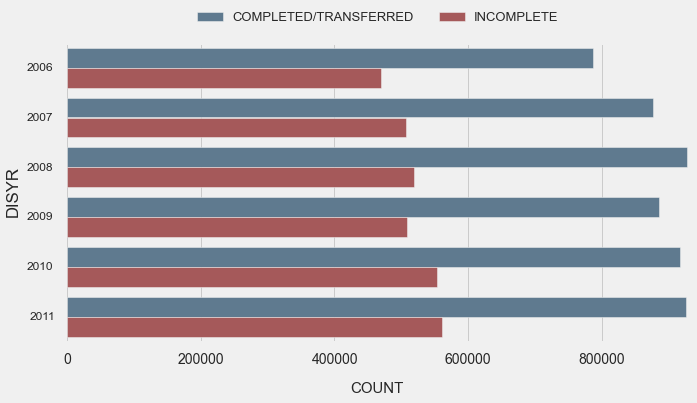

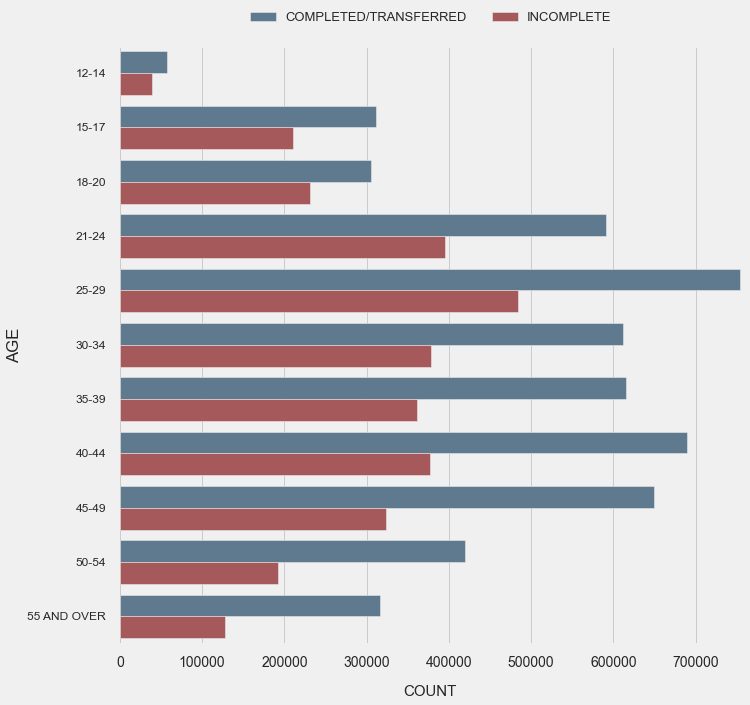

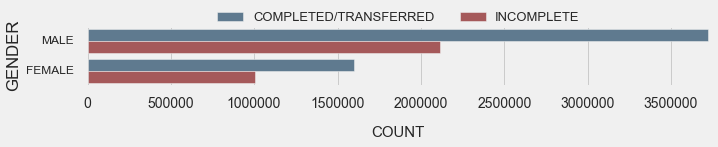

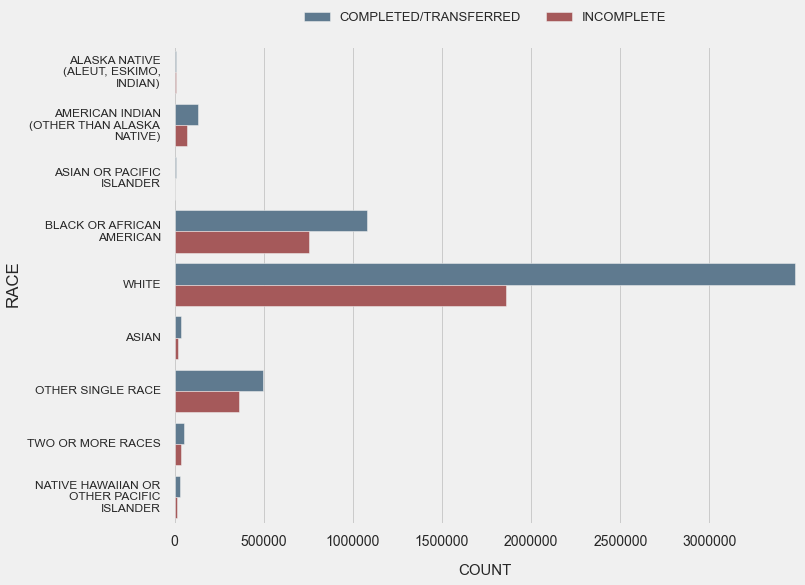

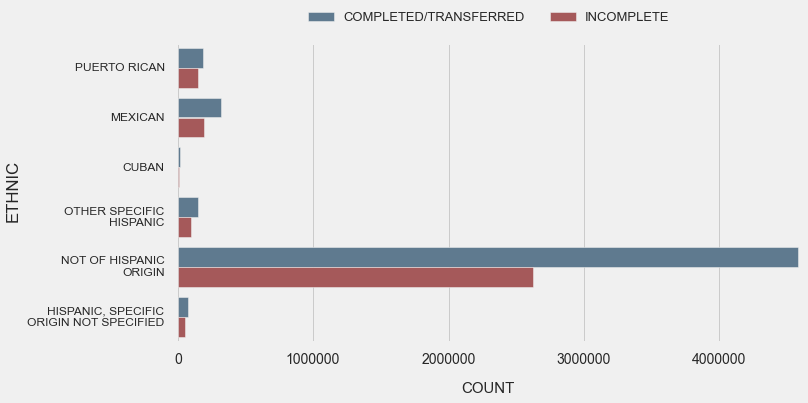

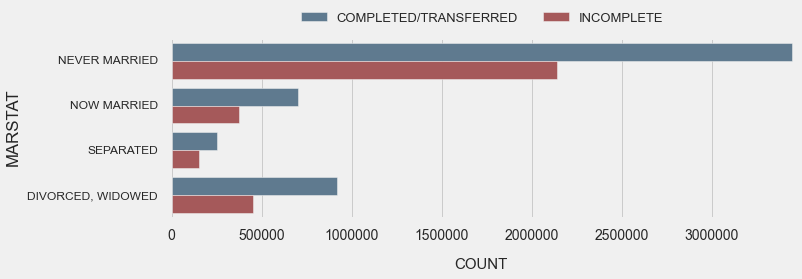

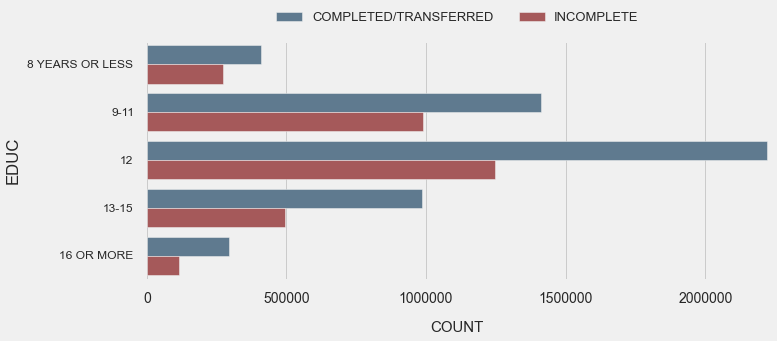

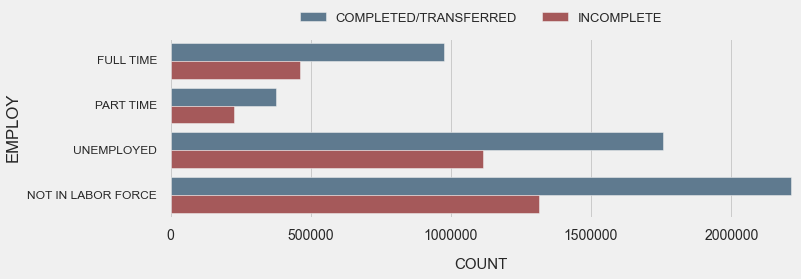

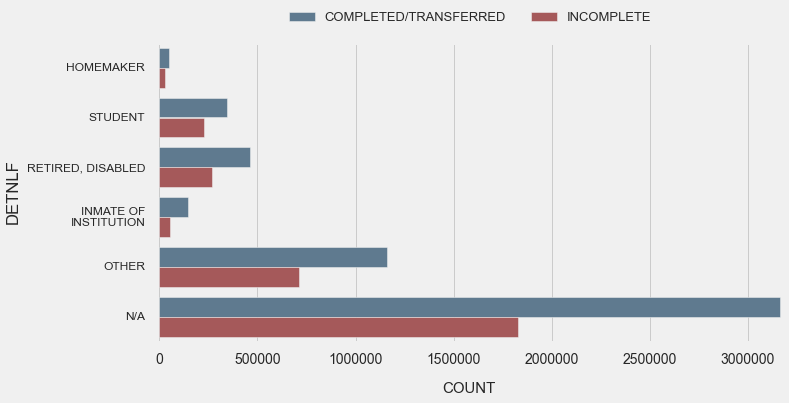

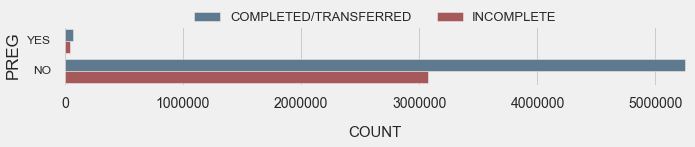

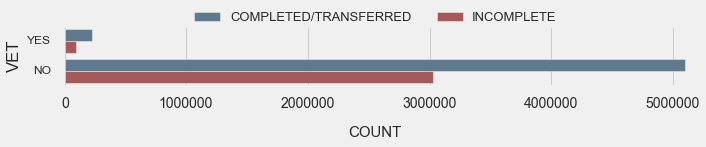

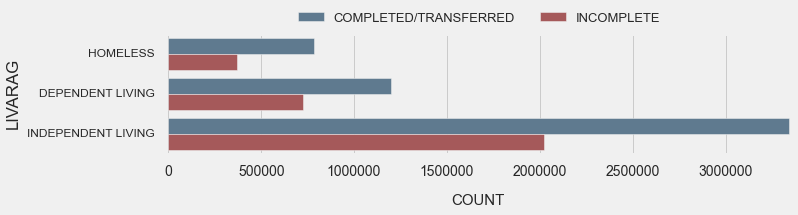

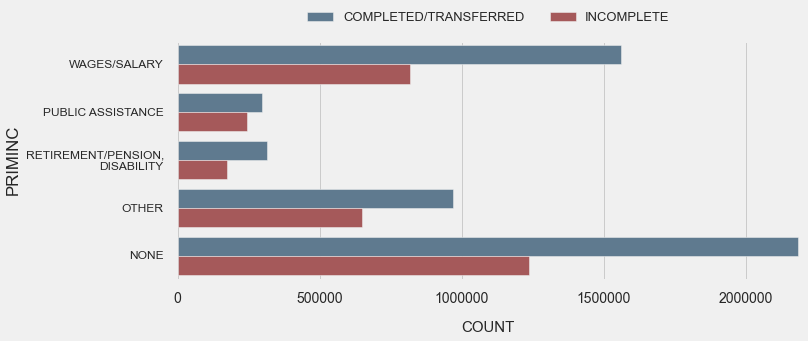

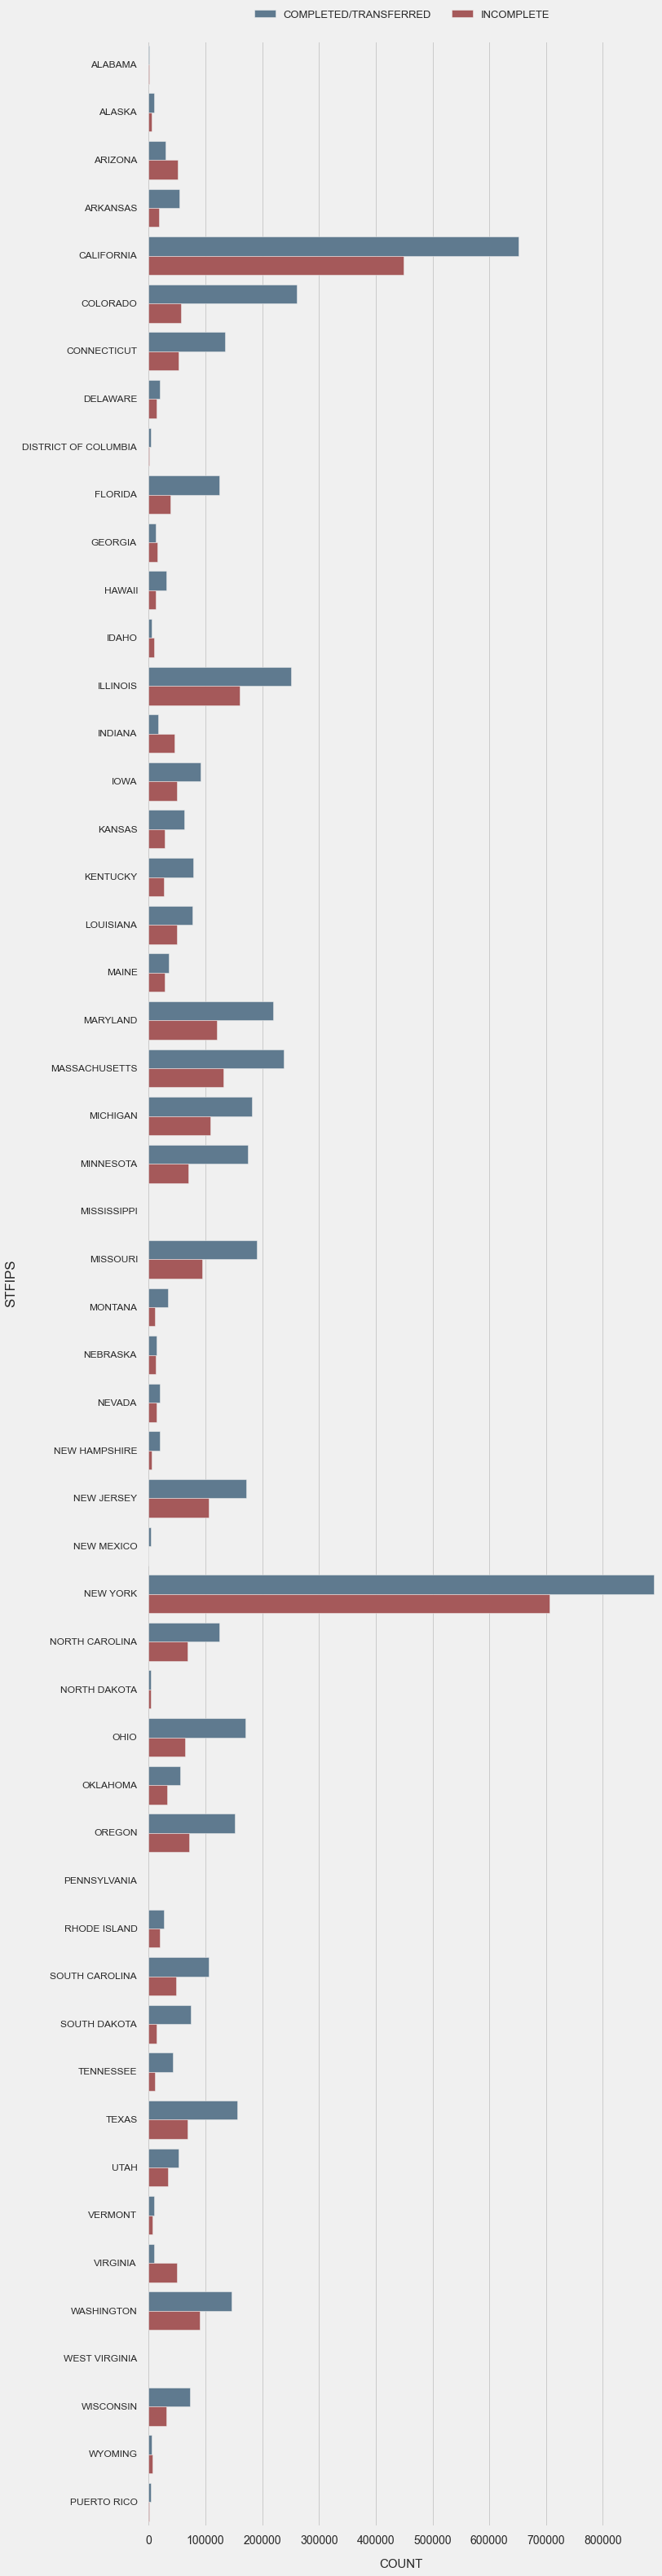

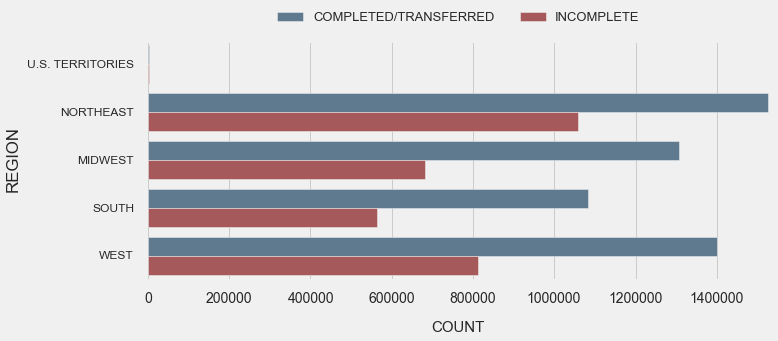

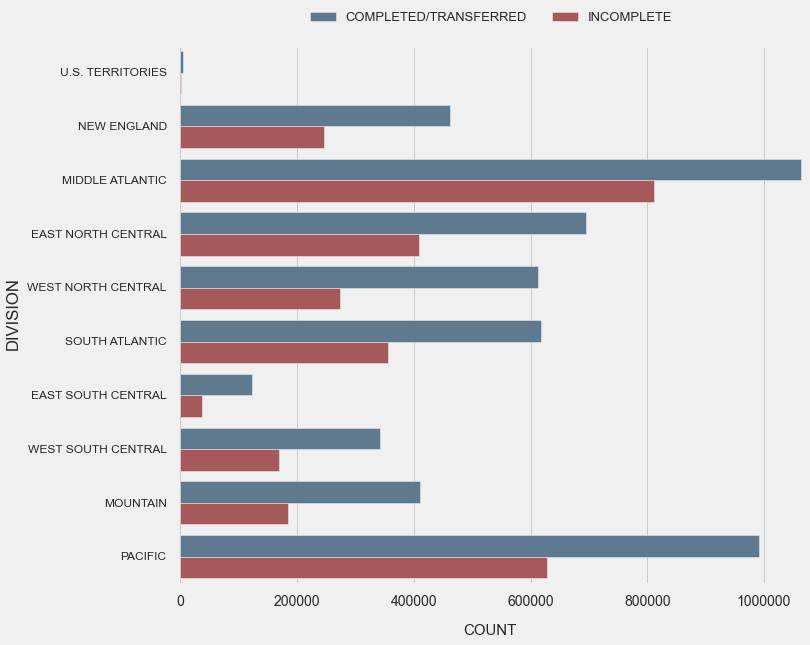

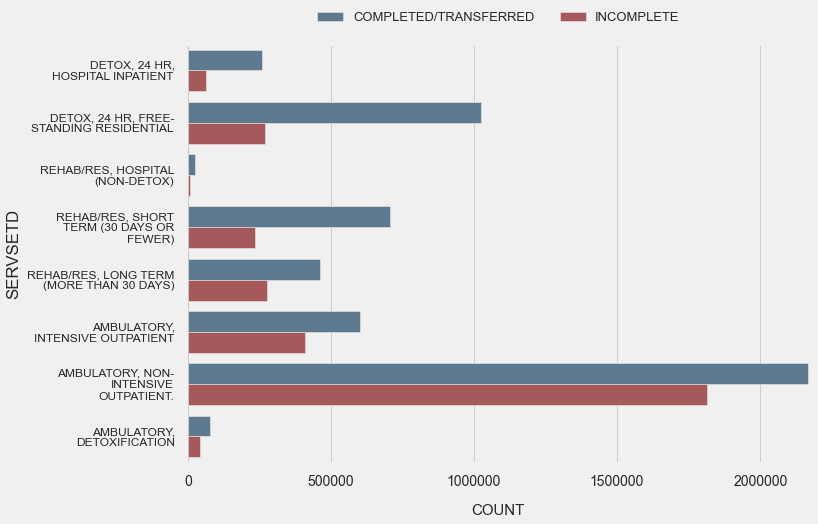

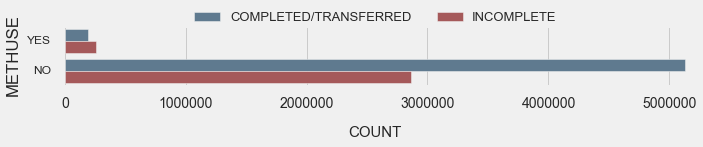

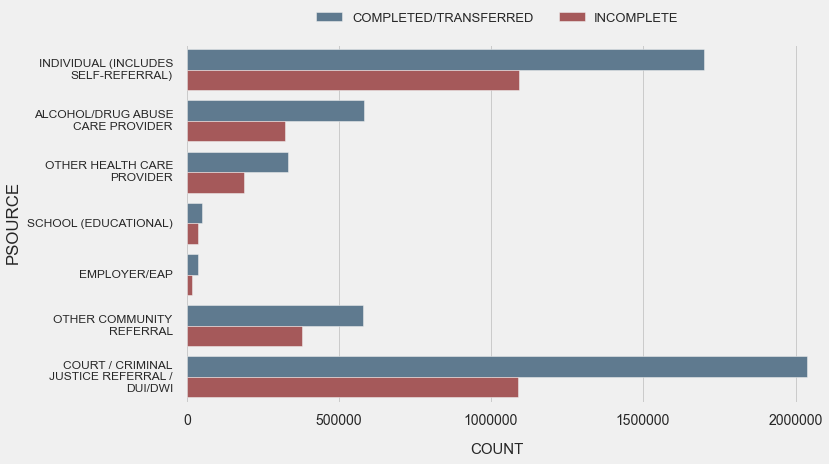

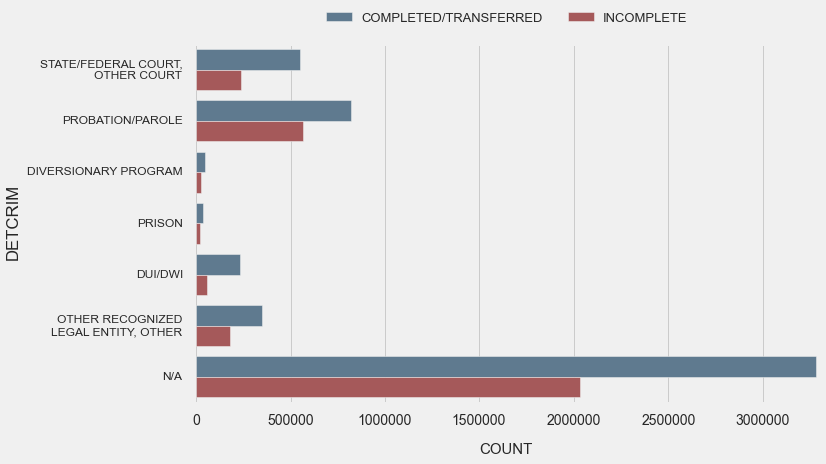

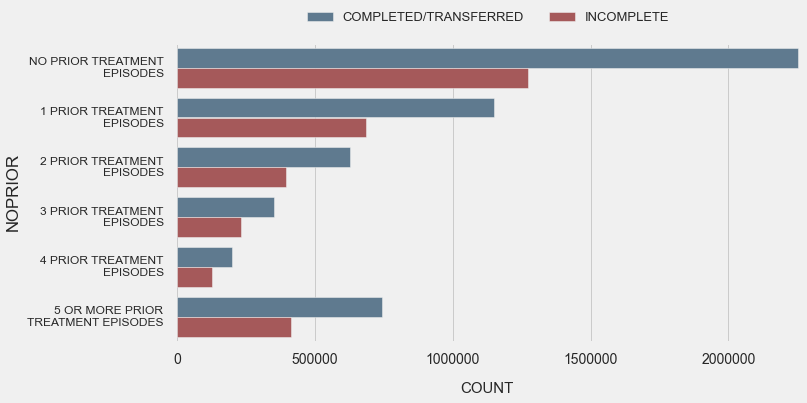

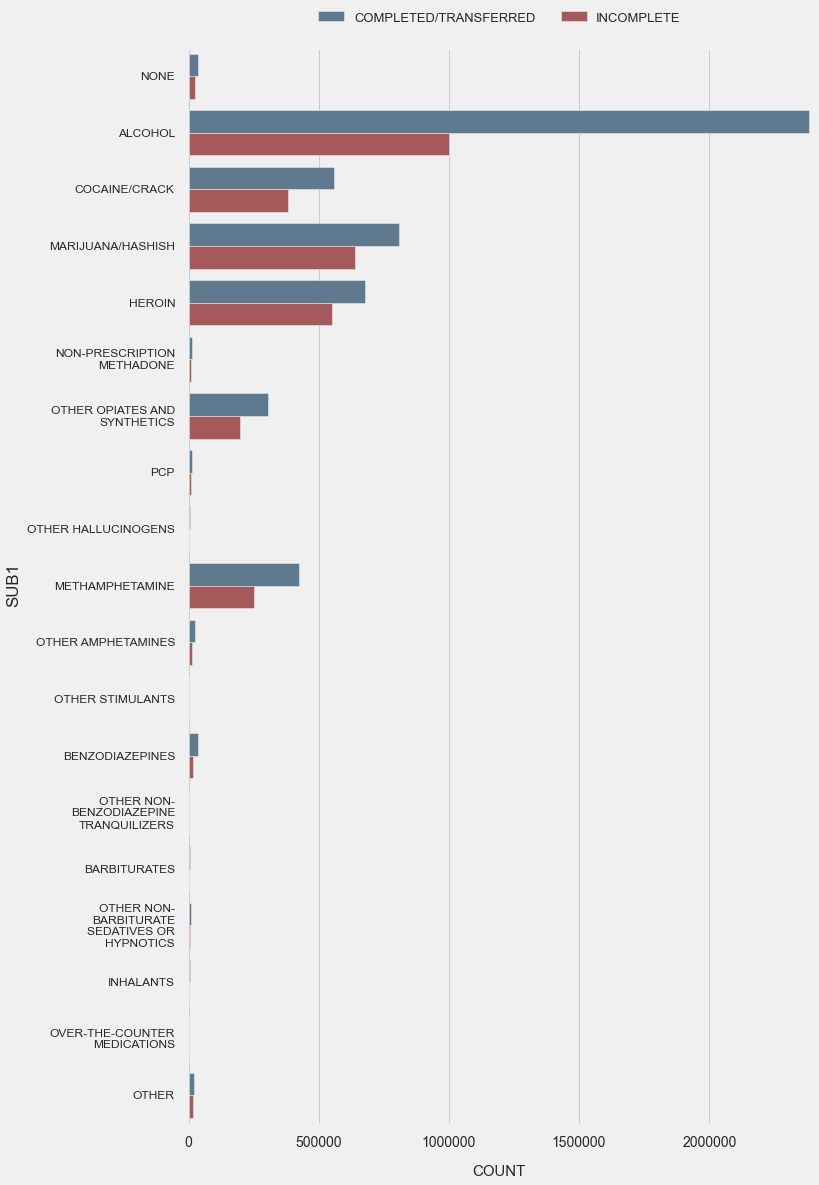

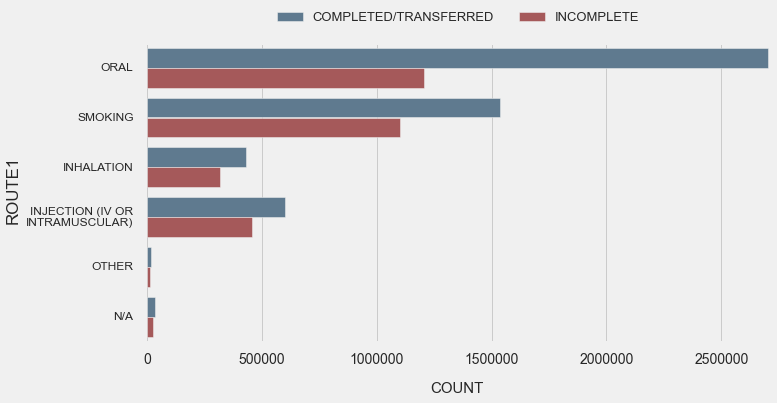

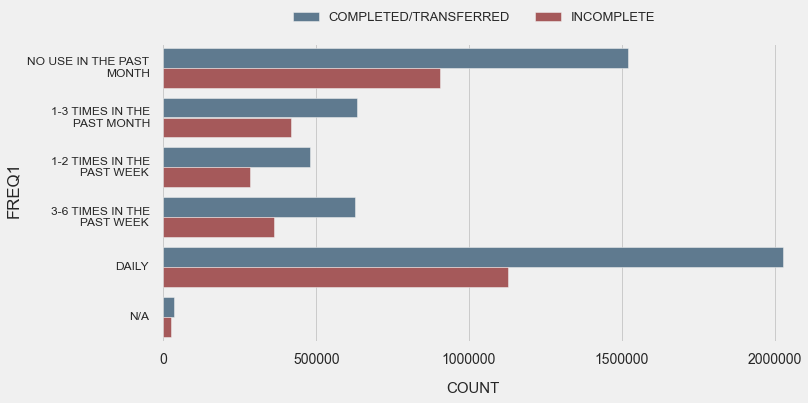

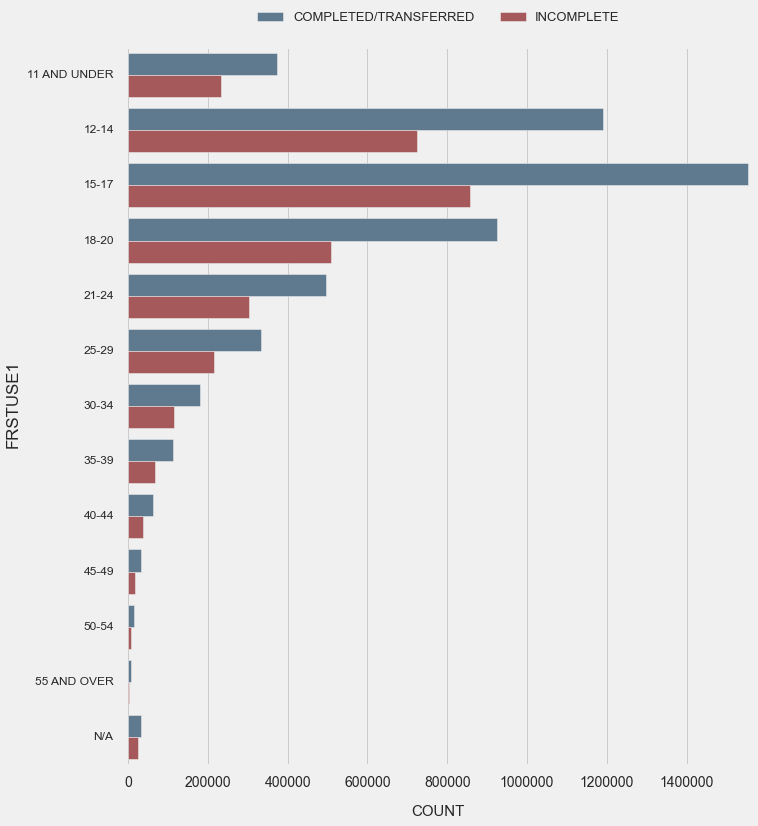

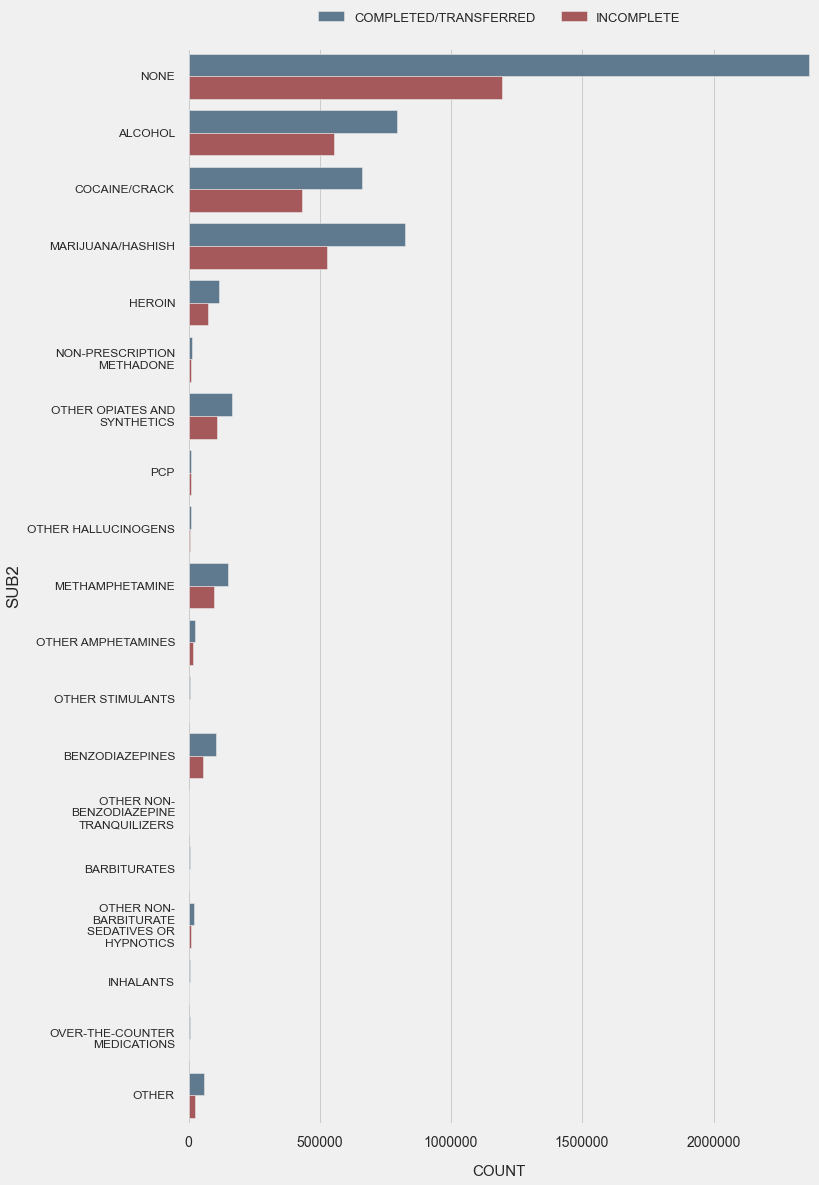

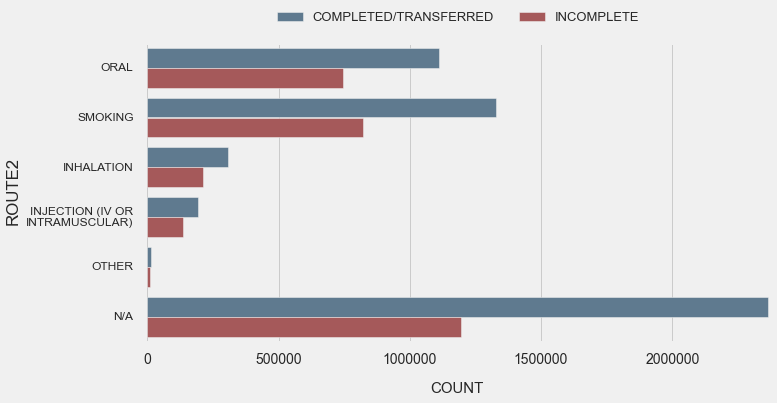

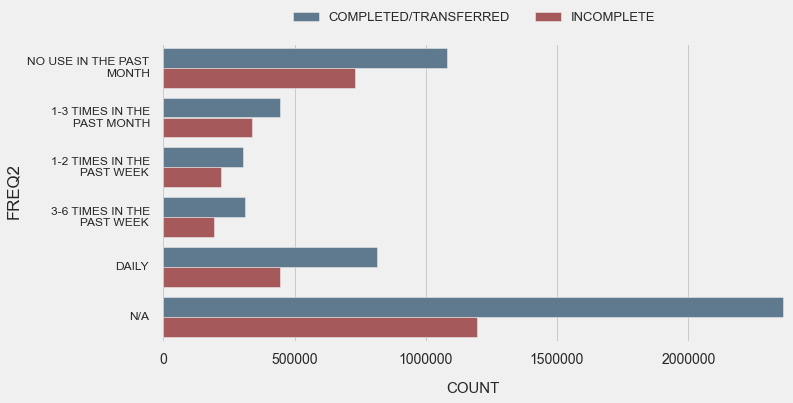

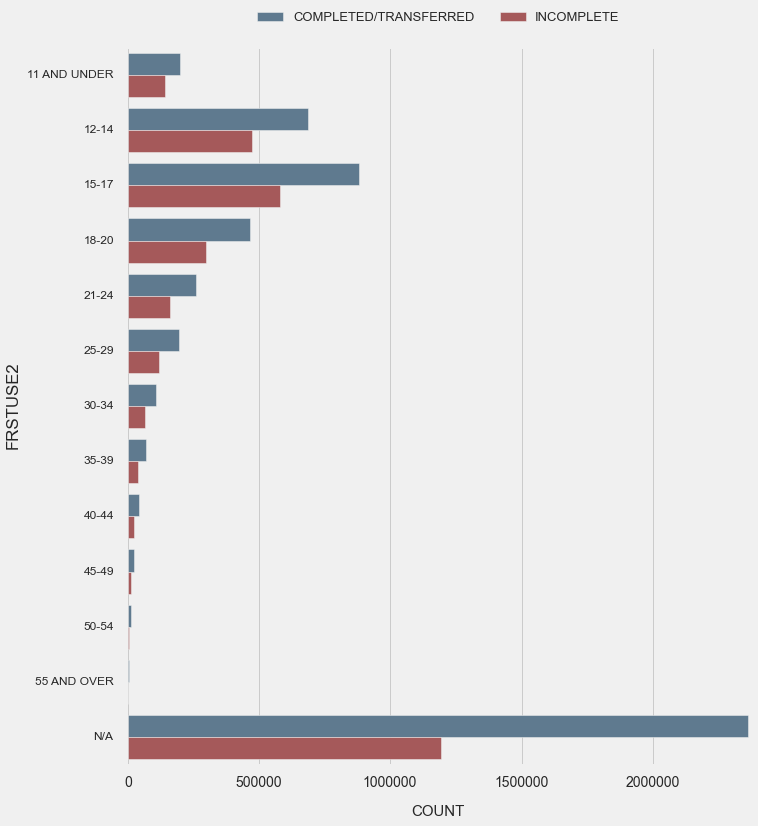

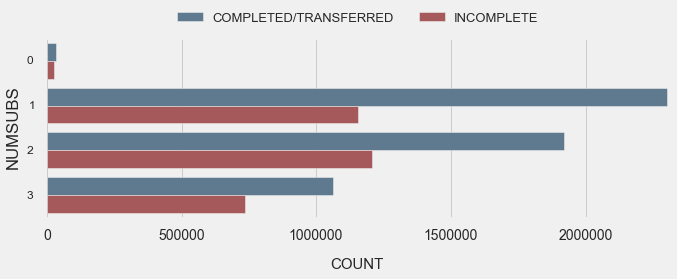

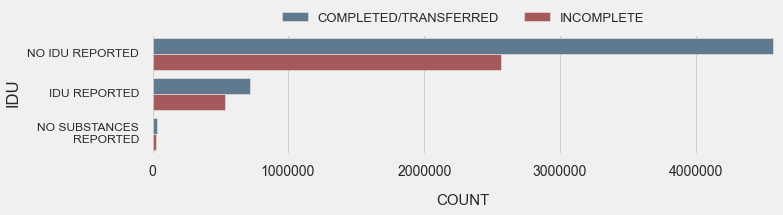

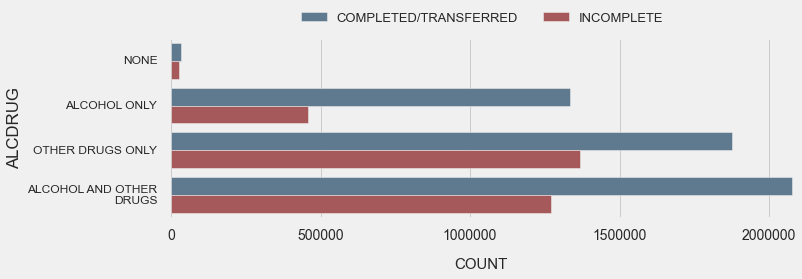

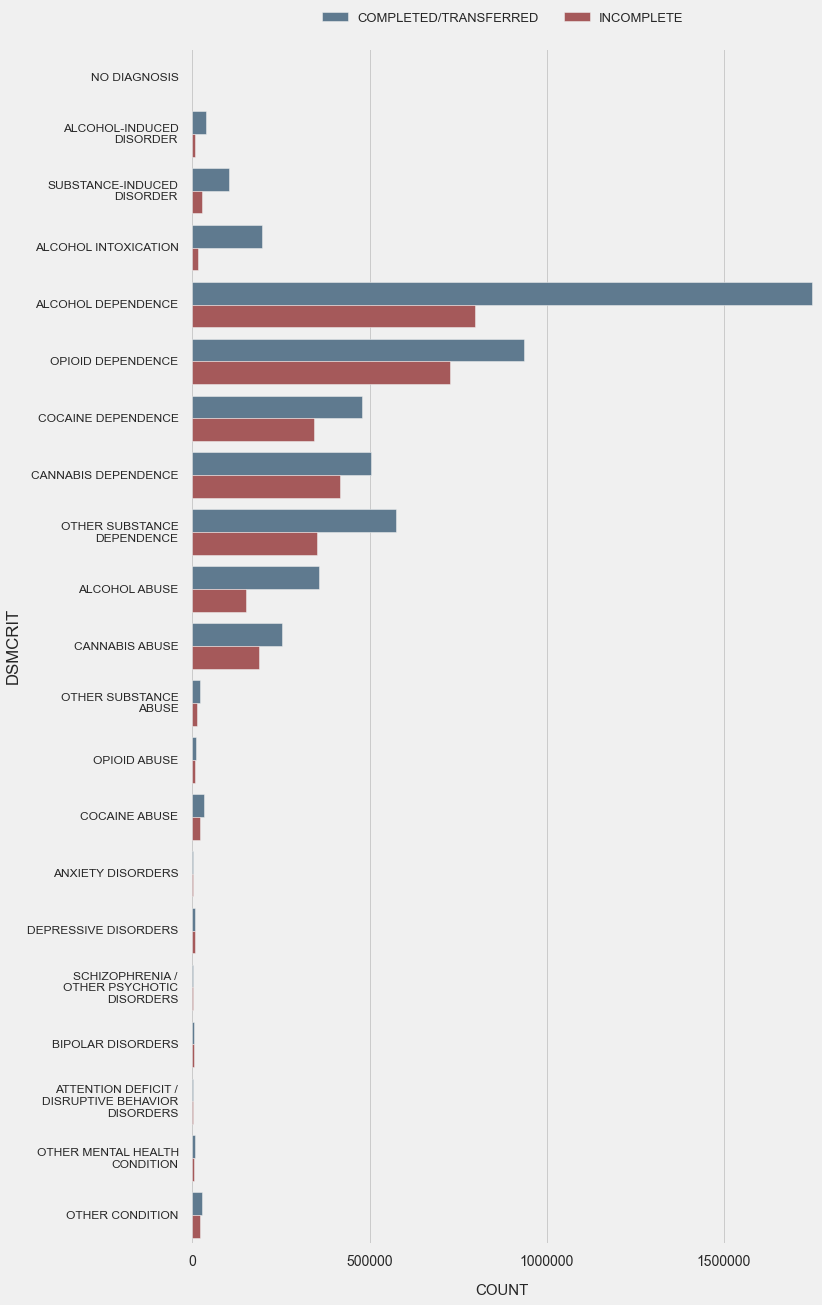

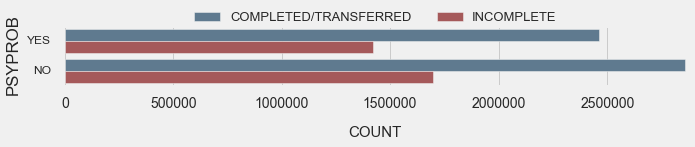

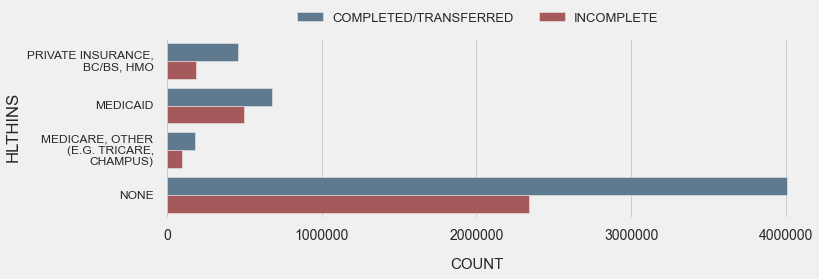

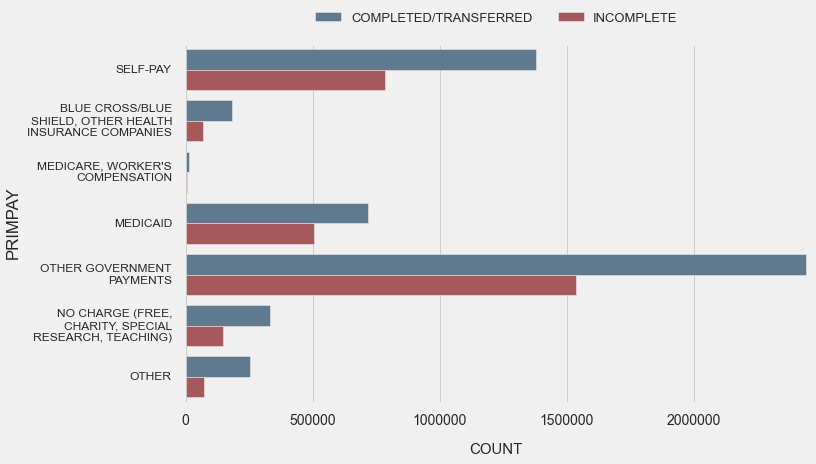

In [90]:

from textwrap import wrap
#define color palette to be used
palette = sns.color_palette("Set1", n_colors=8, desat=.5)
#for first plots, switch the order of color 1 and 2
palette1=[palette[1], palette[0]]

with plt.style.context(('fivethirtyeight')):
    #use 'five thirty eight' plot style
    for col in features:
        
        #adjust figure size according to number of categories in feature
        plt.figure(figsize=(10,(len(var_desc[col].keys()))-1))
        
        #plot the count each category in the given feature, 
        #with the hue as the response variable
        ax=sns.countplot(y=col, hue="RESPONSE", data=df_i, 
                         palette=palette1, order=var_desc[col].keys())
        
        #Allow for wraping of text in yticklabels, based on code from link below
        #http://stackoverflow.com/questions/15740682/wrapping-long-y-labels-in-matplotlib
        #-tight-layout-using-setp
        labels=var_desc[col].values()
        labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
        ax.set_yticklabels(labels, fontsize=12)

        #set location of legend according to number of categories in feature
        y_anchor=1+0.85/len(var_desc[col])
        L=ax.legend(loc='upper center', ncol=2, fontsize=13, bbox_to_anchor=(0.5, y_anchor))
        #Edit legend labels
        L.get_texts()[0].set_text('COMPLETED/TRANSFERRED')
        L.get_texts()[1].set_text('INCOMPLETE')

        ax.set_xlabel("COUNT", fontsize=15, labelpad=15)
        ax.tick_params(axis='x', which='major', labelsize=14)
        plt.margins(0.005)
        plt.show();

## 3.2 ADHERENCE PROPORTION FOR EACH CATEGORY BY FEATURE

To help identify whether a certain characteristic has an effect on treatment adherence, one must compare the categorical adherence rate with the overall population rate. For this, we compare adherence rate from each categorical value to the mean adherence rate as well as the other categorical rates. 

For example, the adherence rate for males is around 62% while the general population rate is 63%. The difference between these rates is quite small. Without completing a complete statistical analysis, if the categorical rate differs greatly from the population rate then that may imply an effect of the category on treatment program adherence and should be studied in further detail.

Below, we find the distribution of all of arithmetic difference between the categorical rates and the population rate.

In [62]:
#create dataframe of only positive response
positive=df_i[df_i['RESPONSE']>0]
#calculate the mean response of the entire population
mean_rate=df_i['RESPONSE'].mean()

#create list of differences between response mean for one category
# and the population mean
differences=[]
for col in features:
    splits=positive[col].value_counts()/df_i[col].value_counts()
    for i in (splits.values-mean_rate):
        differences.append(i)

std_dev=np.std(differences)

p05 = np.percentile(differences, 5.)
p95 = np.percentile(differences, 95.)

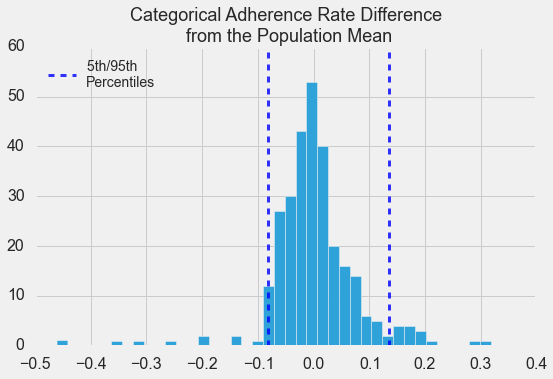

In [108]:
with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(8,5))
    plt.hist(differences, bins=40)
    plt.title("Categorical Adherence Rate Difference \n from the Population Mean", fontsize=18)
    plt.axvline(x=p05, ymin=0, ymax=100, linewidth=3, alpha=0.8,
               linestyle = "--", label="5th/95th \nPercentiles")
    plt.legend(loc='upper left', fontsize=14)
    plt.axvline(x=p95, ymin=0, ymax=100, linewidth=3, alpha=0.8,
               linestyle = "--");

We then plot the categorical adherence rates for each feature and overlay the mean and 5th/95th percentile adherence rates.

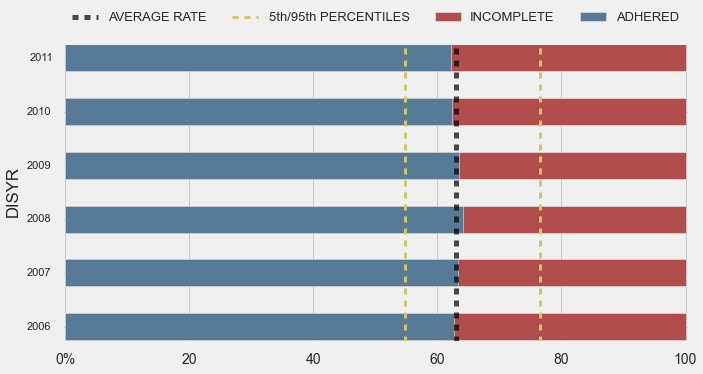

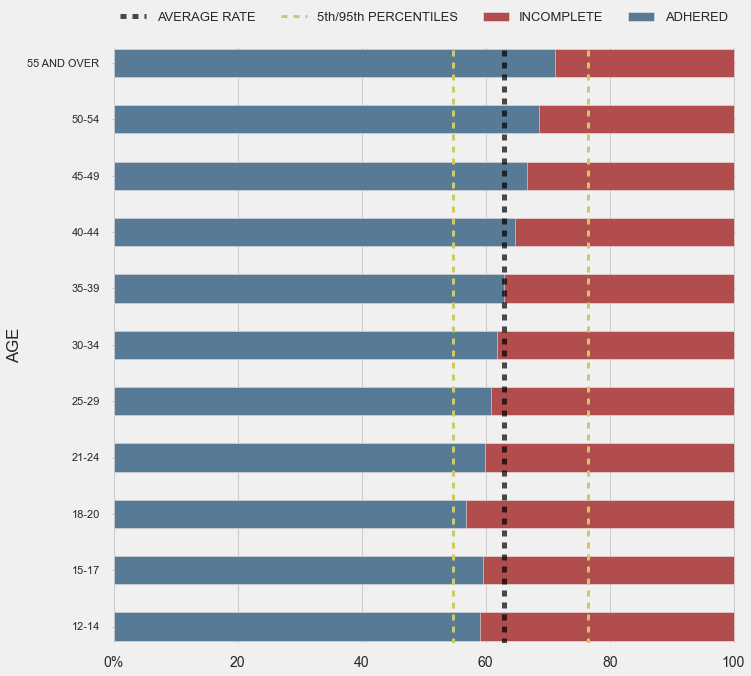

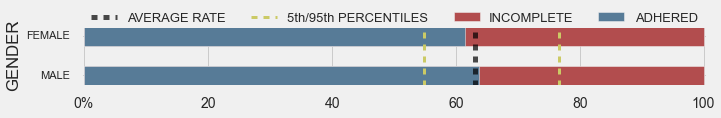

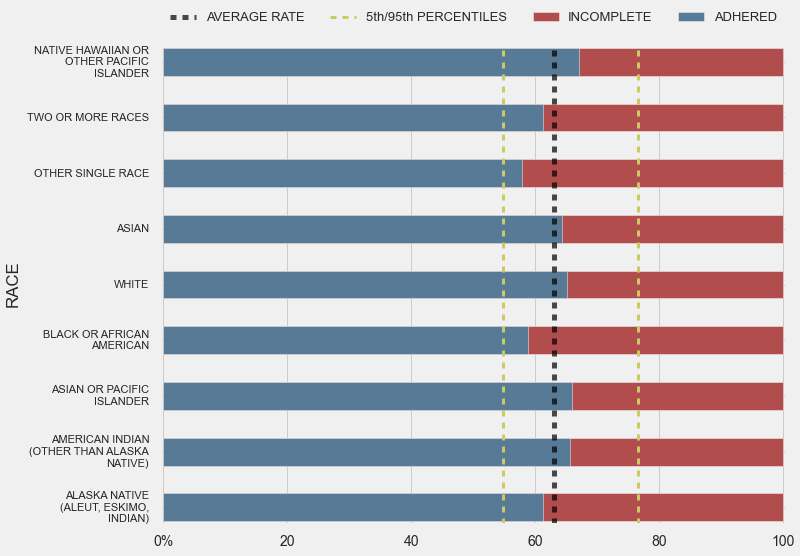

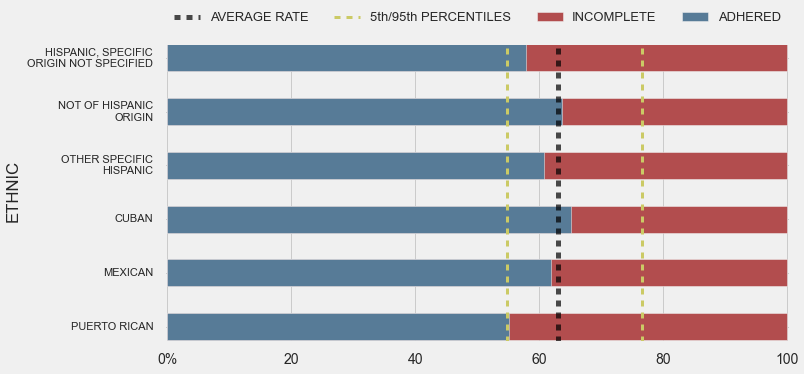

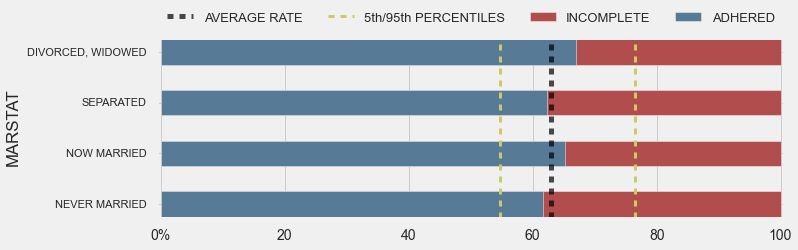

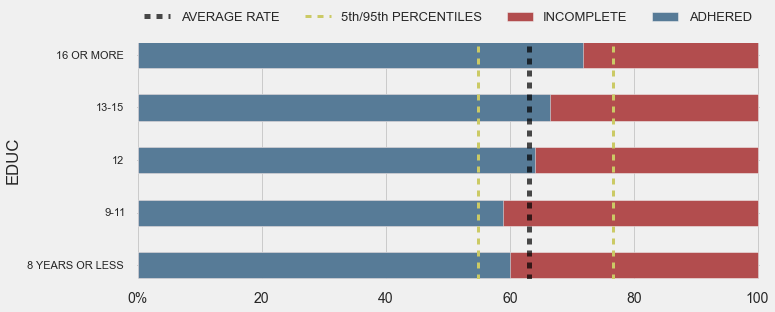

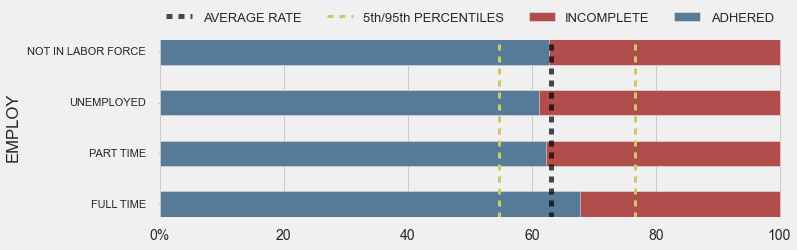

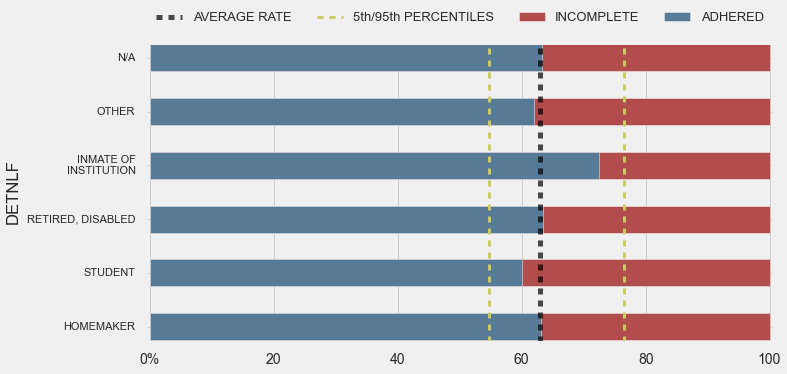

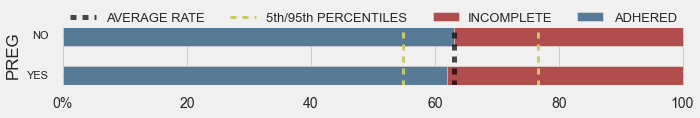

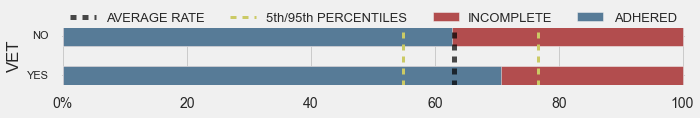

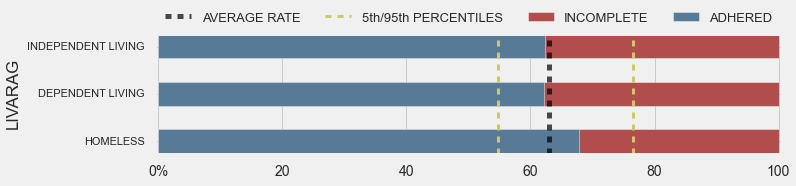

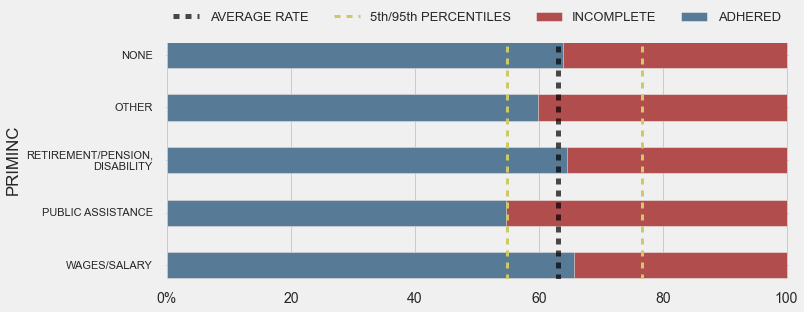

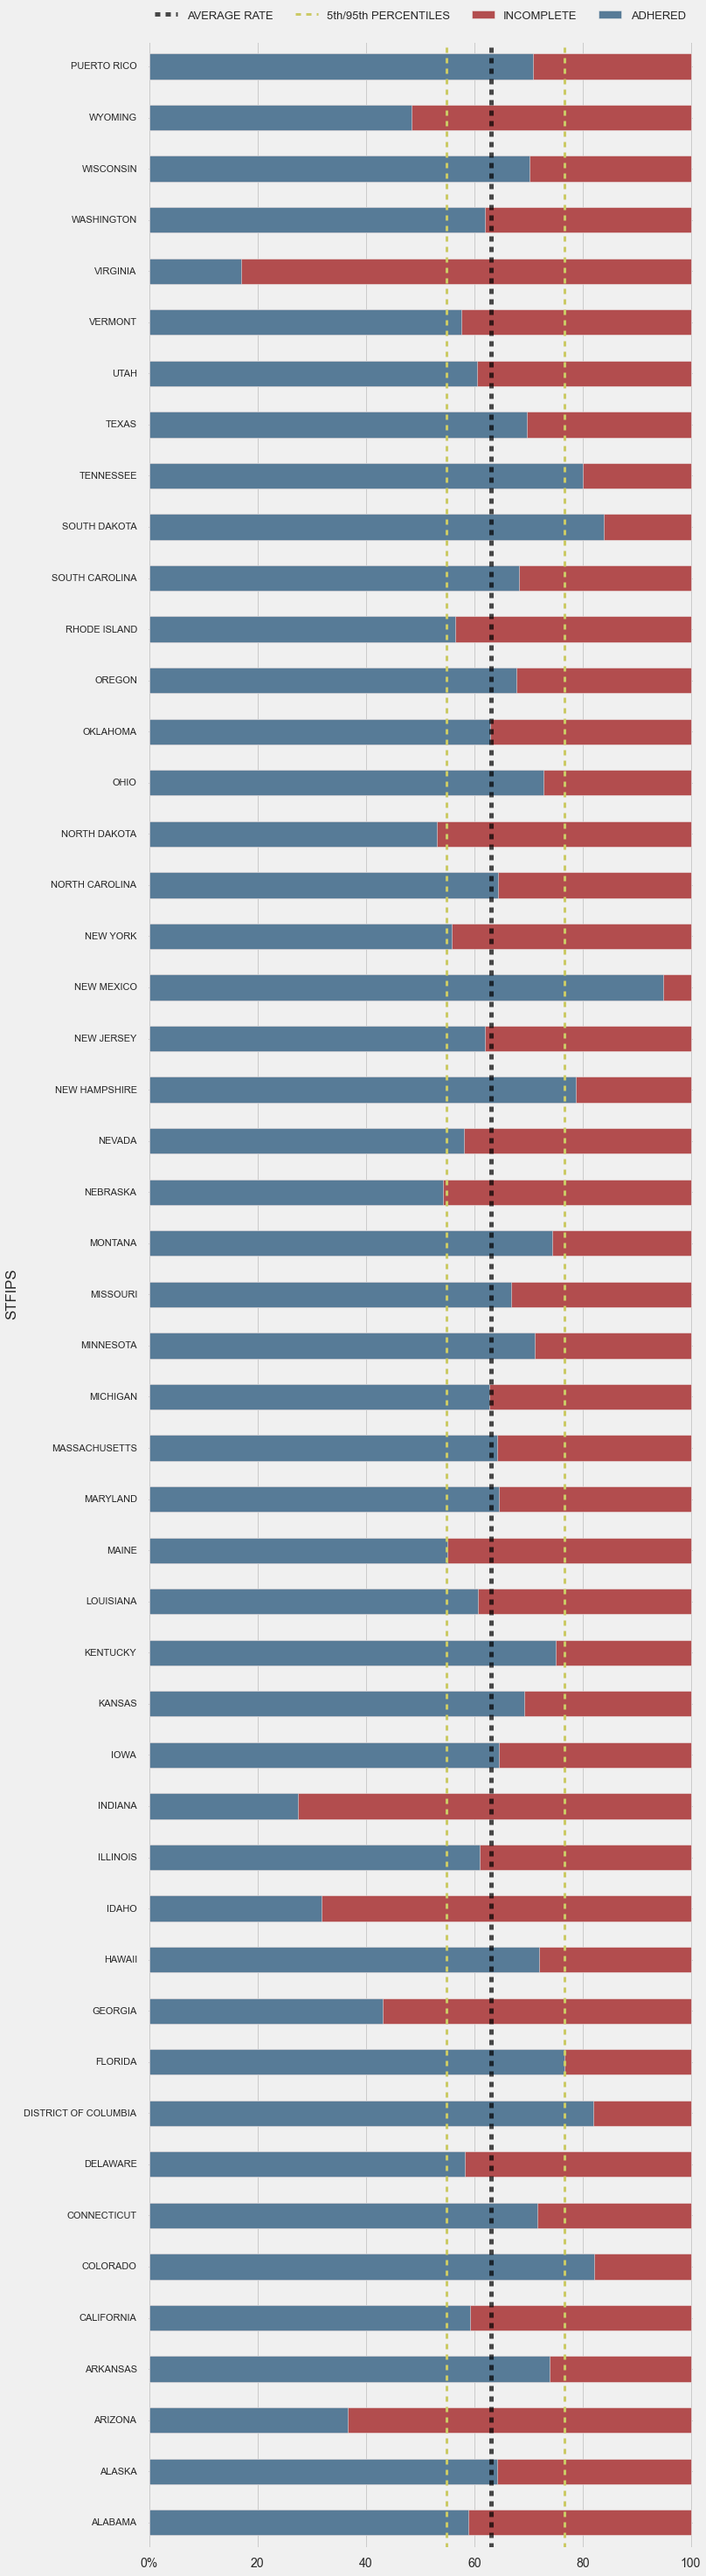

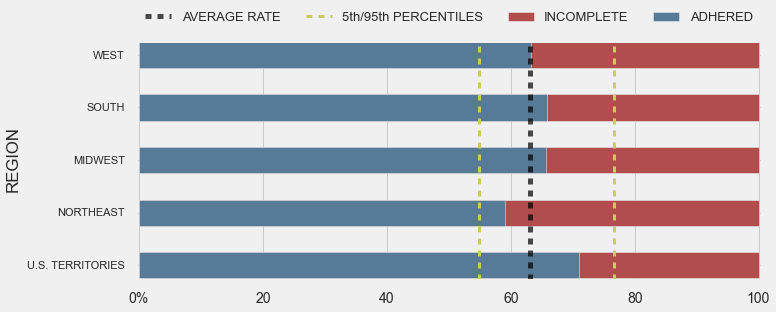

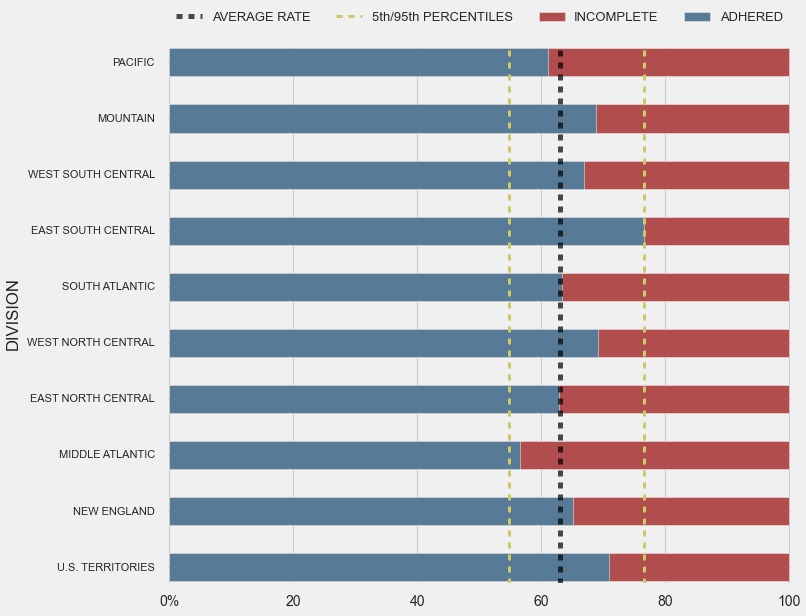

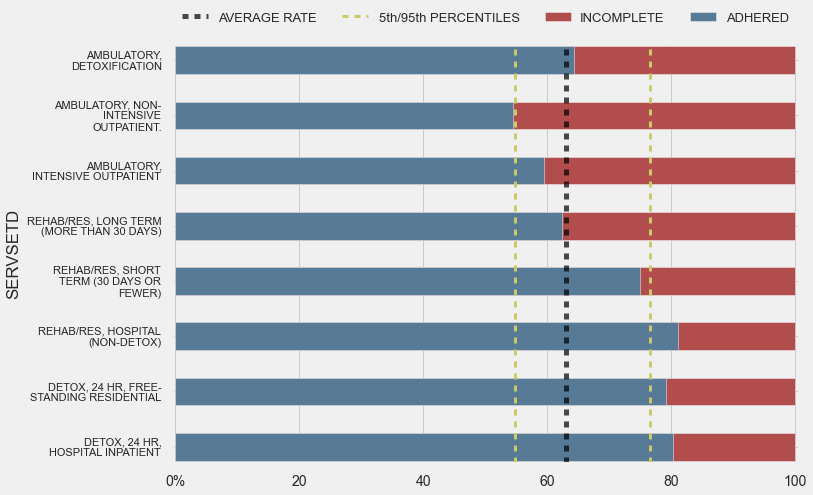

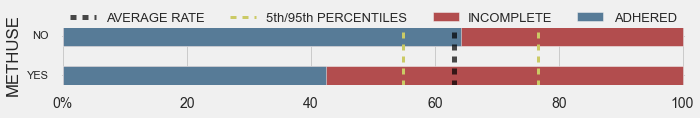

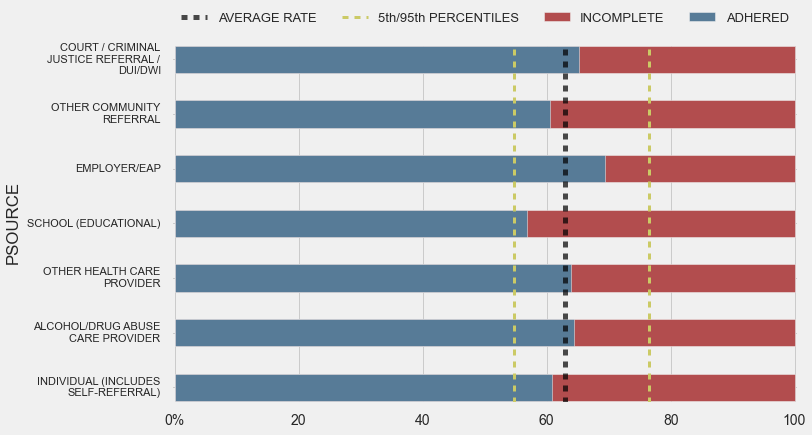

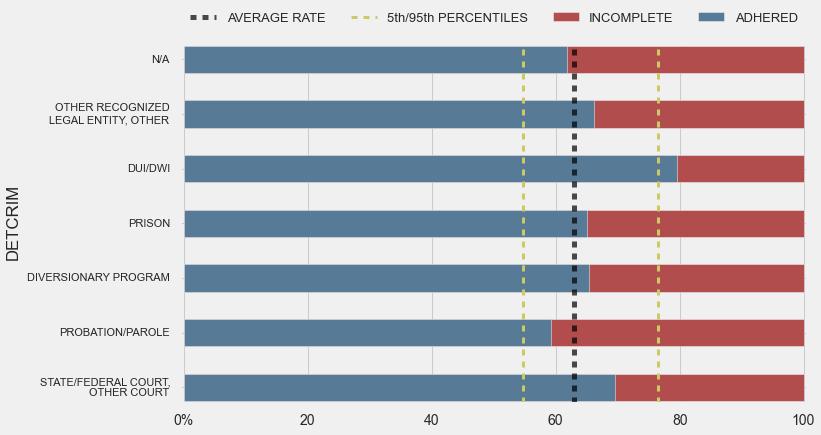

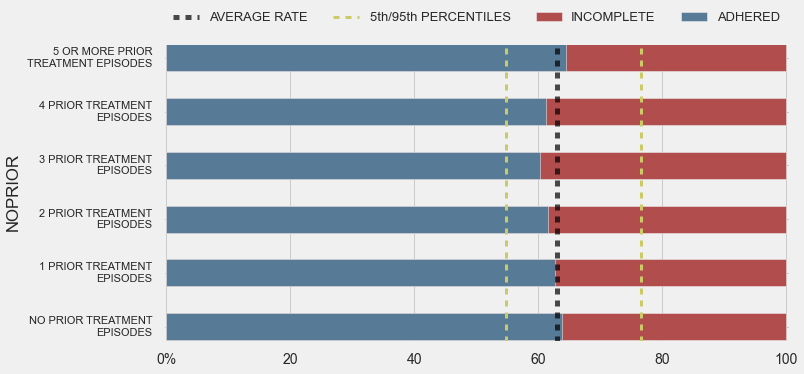

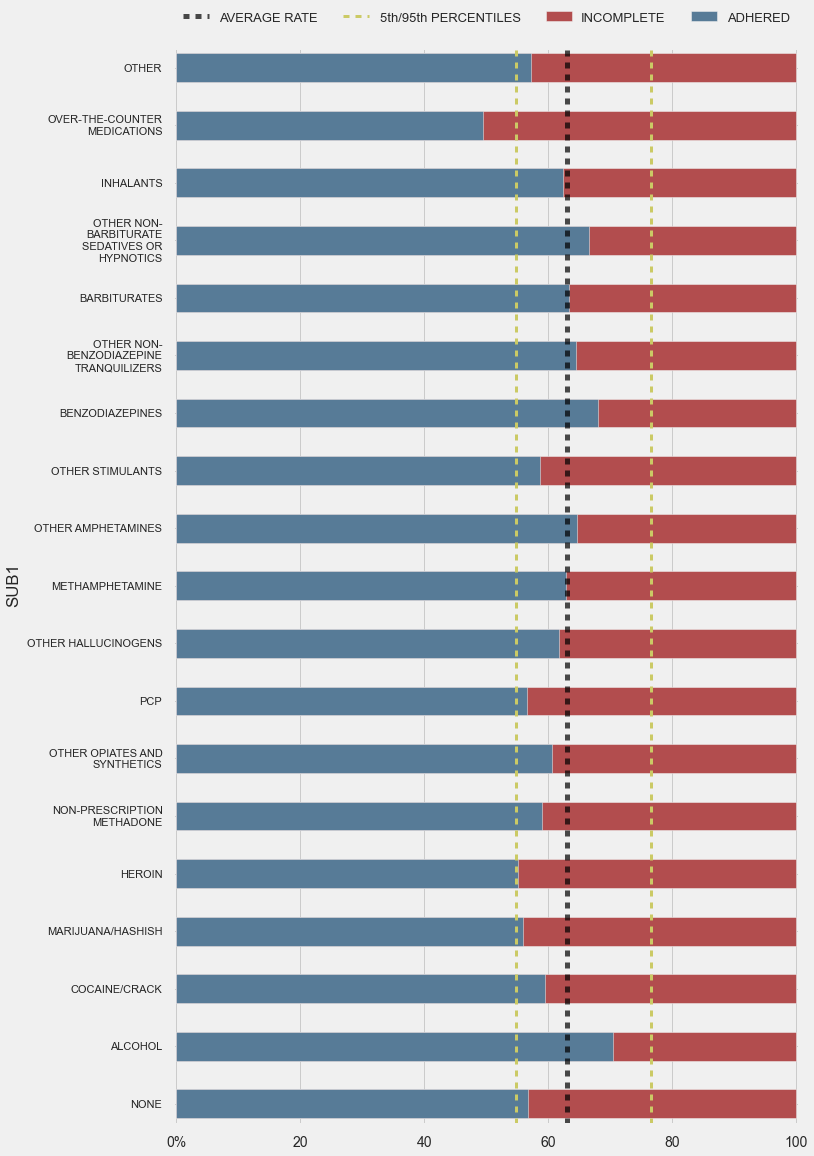

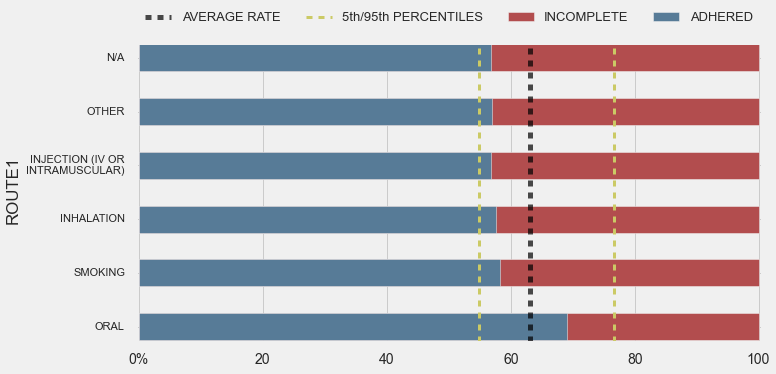

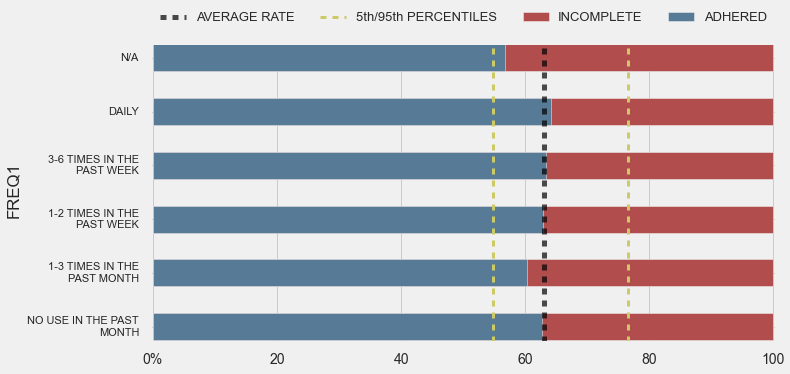

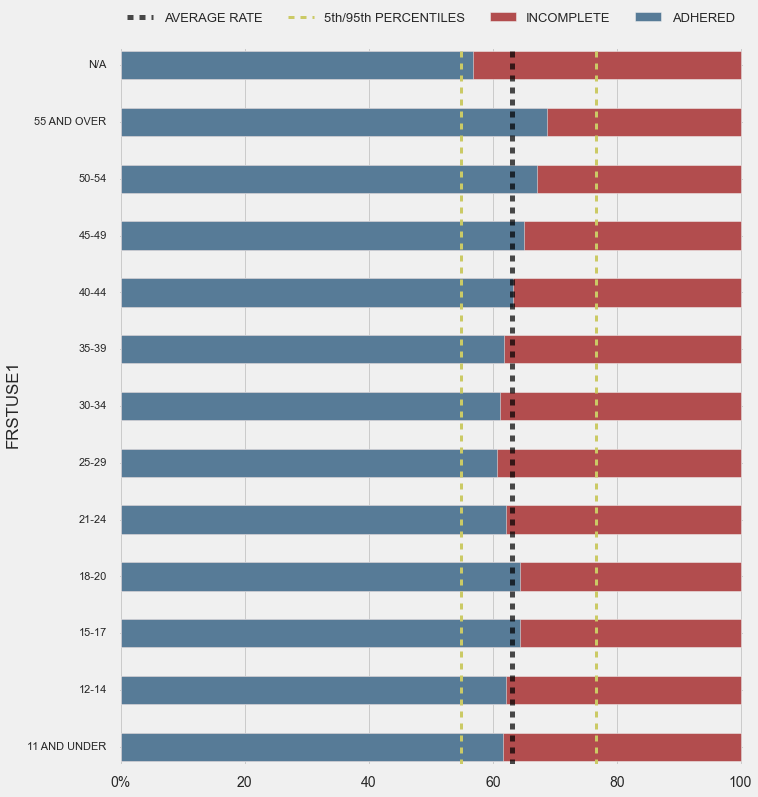

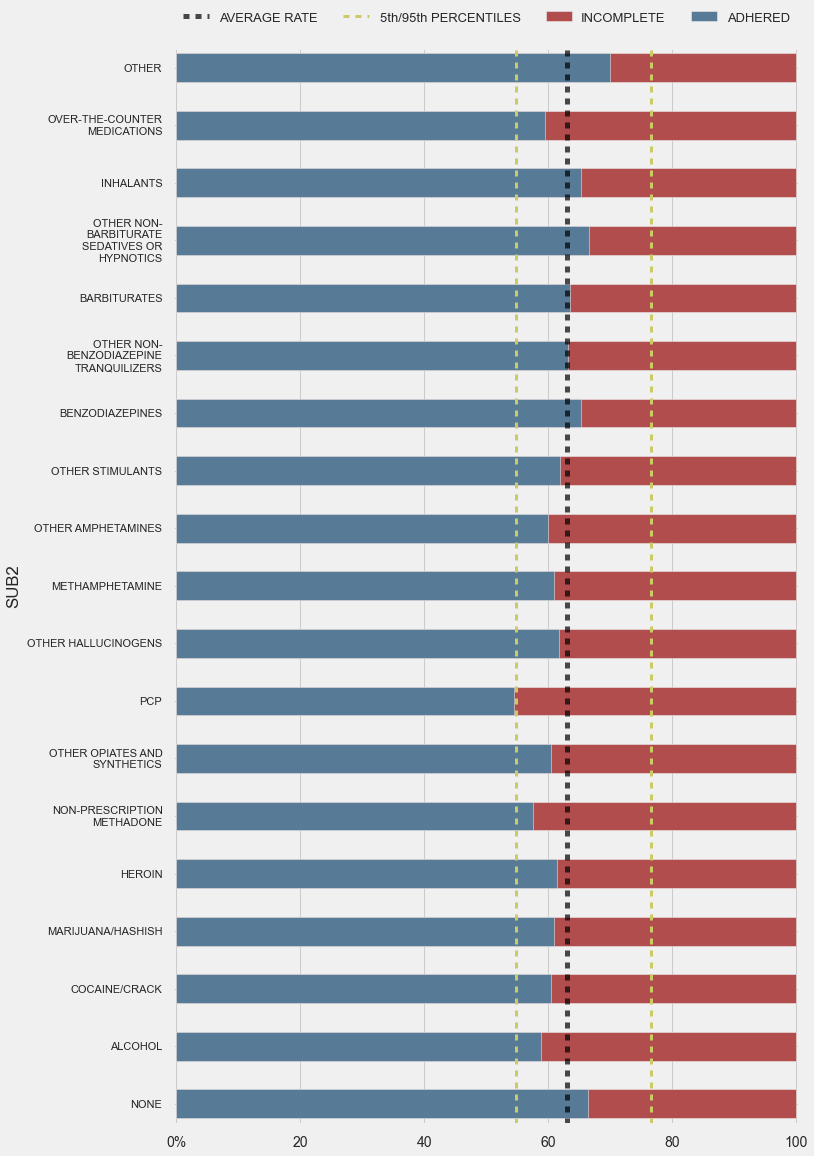

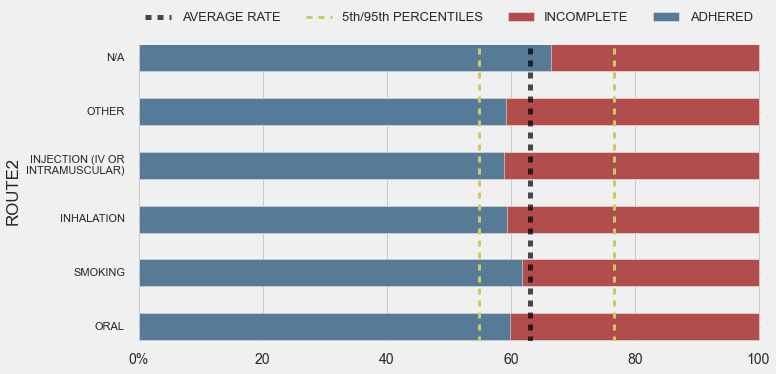

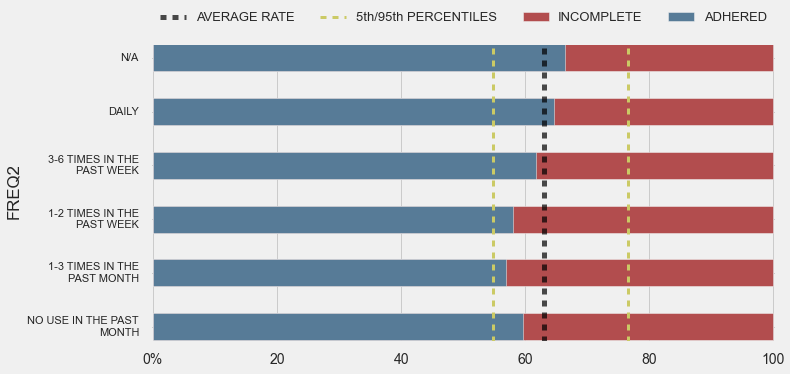

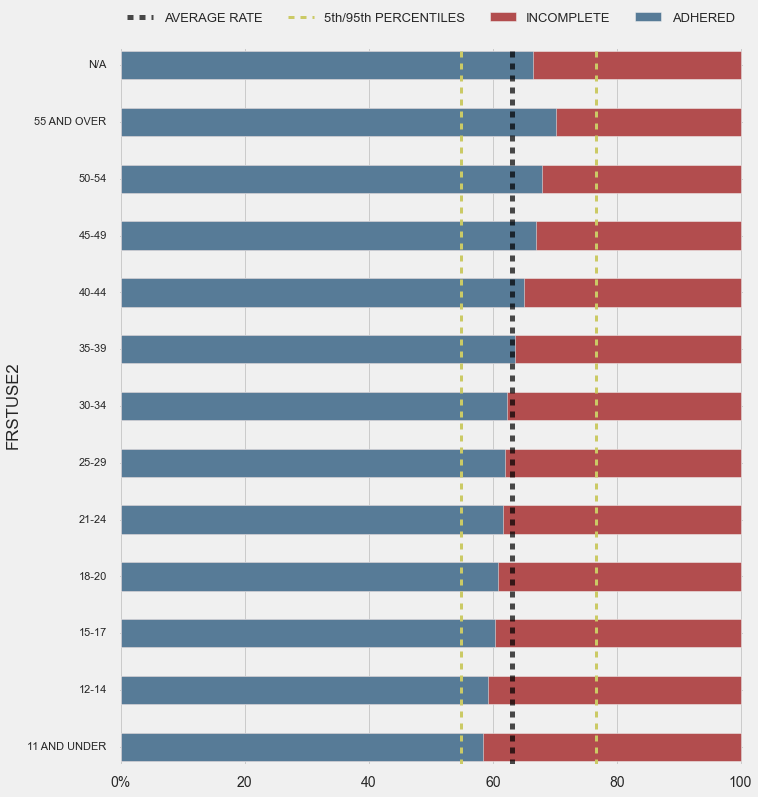

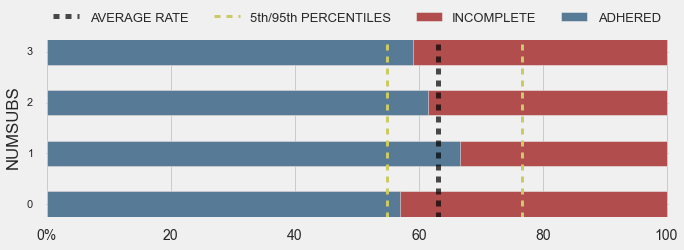

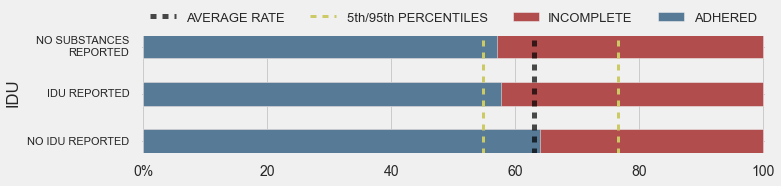

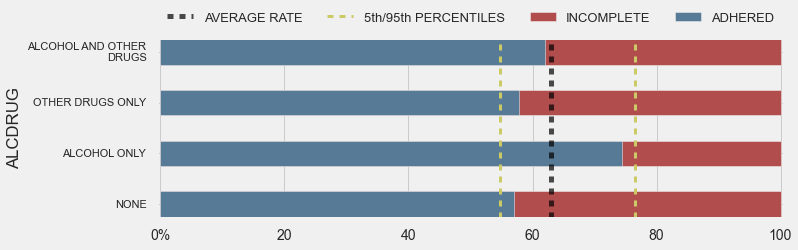

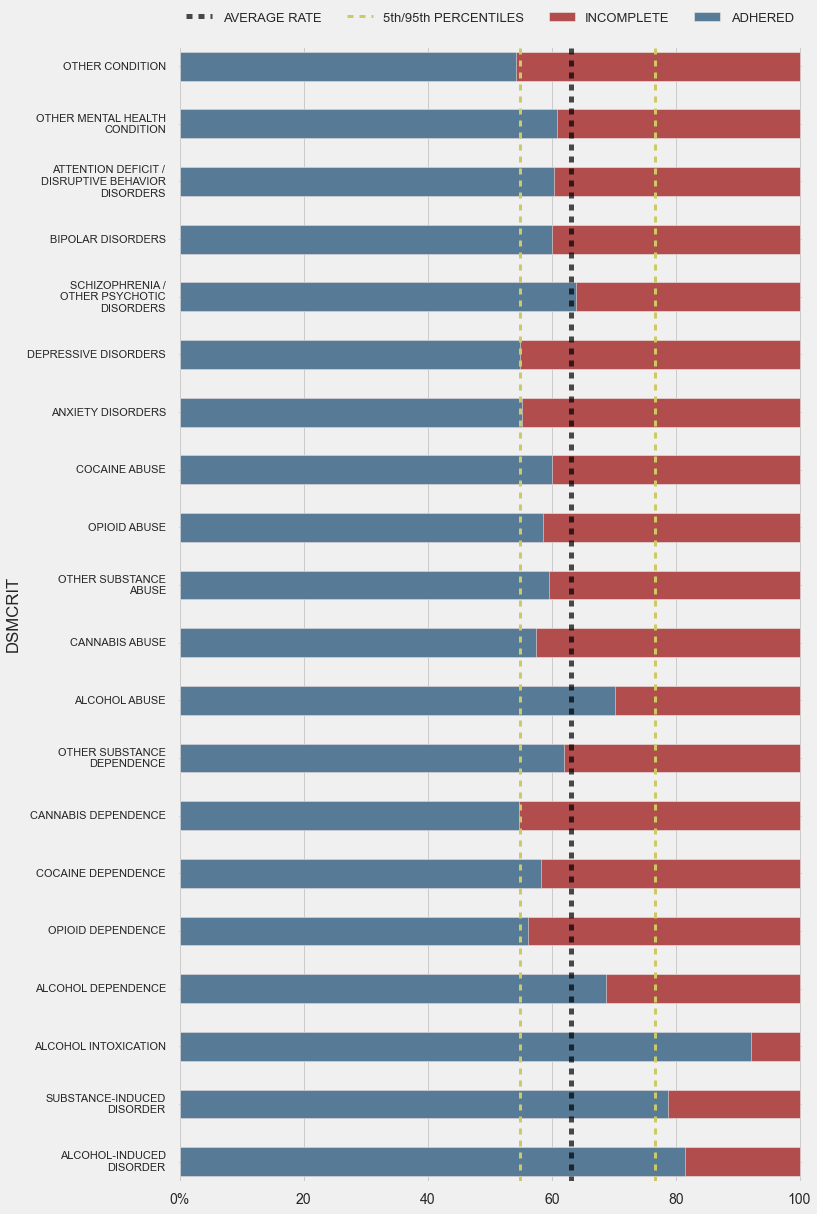

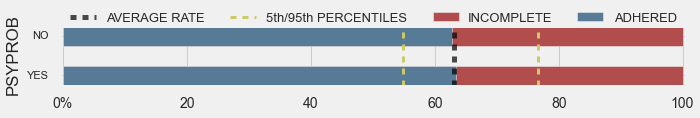

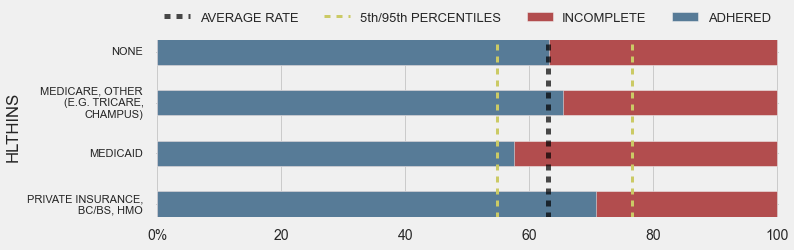

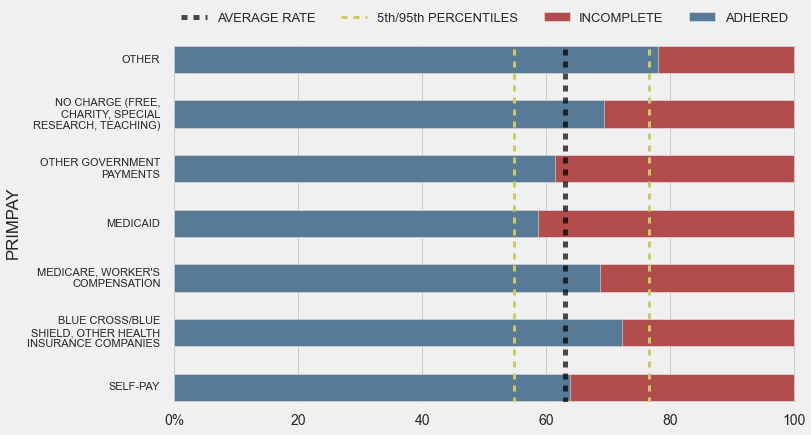

In [139]:
with plt.style.context(('fivethirtyeight')):
    for col in features:
        #calculate the adherence rate for each category in feature col
        splits=(positive[col].value_counts()/df_i[col].value_counts()).sort_index()
        
        #plot proportions of positive and negative response
        plt.figure(figsize=(10, splits.shape[0]-1))
        plt.barh(range(len(splits.index)), np.ones(len(splits.index)), 
                 align='center', color=palette[0], label="INCOMPLETE", height=0.5)
        plt.barh(range(len(splits.index)), splits.values, 
                 align='center', color=palette[1], label="ADHERED", height=0.5)

        #plot lines for the population mean, 5th percentile, and 95th percentile
        plt.axvline(x=mean_rate, ymin=0, ymax=100, linewidth=5, alpha=0.7,
                   linestyle = "--", label="AVERAGE RATE", color='k')
        plt.axvline(x=mean_rate + p05, ymin=0, ymax=100, linewidth=3,
                   linestyle = "--", label="5th/95th PERCENTILES", color=palette[5])
        plt.axvline(x=mean_rate + p95, ymin=0, ymax=100, linewidth=3,
                   linestyle = "--", color=palette[5])
        
        #Allow for wraping of text in yticklabels, based on code from link below
        #http://stackoverflow.com/questions/15740682/wrapping-long-y-labels-in-matplotlib
        #-tight-layout-using-setp
        labels=[var_desc[col][i] for i in splits.index]
        labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
        
        #set location of legend according to number of categories in feature
        y_anchor=1+0.85/len(var_desc[col])
        plt.legend(loc='upper center', ncol=4, fontsize=13, bbox_to_anchor=(0.5, y_anchor))
        
        #add custom tick labels with category descriptions
        plt.ylabel(col)
        plt.yticks(range(len(splits.index)), labels, fontsize=11)
        newxticks=['0%',20,40,60,80,100]
        plt.xticks([0.0,0.2,0.4, 0.6,0.8,1.0], newxticks, fontsize=14)
        plt.margins(0.005)
        plt.show();

Most categories have an adherence rate similar to the population mean, however, certain features stood out. Below are some best and worst groups in terms of adherence rate:

**UNDERPERFORMING GROUPS**
- 18-20 year olds
- Puerto Rican ethnicity
- Primary source of income: public assistance
- Residents of Wyoming, Virginia, Indiana, Idaho, Georgia, Arizona
- Ambulatory non-intensive outpatient treatment participants
- Medication assisted opioid therapy participants
- Primary drug of abuse: over-the-counter medications
- Primary drug of abuse: heroin

**HIGH-ACHIEVING GROUPS**
- 55 years and older
- 16 Years or more of education
- Current inmates in correctional facility
- Residents of Tennessee, South Dakota, New Mexico, New Hampshire, Colorado, DC, Florida
- Short term rehabilitation and detox participants
- Criminal justice referral type: DUI
- Primary drug of abuse: alcohol

The **analysis of single variables** is useful, but **neglects to consider interactions between variables**. For example, it may be interesting to know what is the adherence rate of heroin users from Wyoming. 

In the following section, we explore the interactions between two variables with the objective of gaining a better understanding of the drivers of treatment adherence as well as the creation of features for the predictive Logistic Regression classification model that will be implemented later in this notebook.

## 3.3 EXPLORATION OF THE EFFECT OF GEOGRAPHY ON ADHERENCE RATE

The effect of geographical factors on adherence rates was explored in depth using Tableau visualizations. These visualizations and analysis can be found on the [webpage for this project.](http://tnames.github.io/DRUG_TREATMENT_PROJECT)

## 3.4 FEATURE SELECTION: VARIABLE INTERACTIONS AND BAYESIAN INFERENCE

How do we find the effect of two variables on treatment program adherence? In the function `interactions` below, for each combination between two categories from two different features, we find the mean adherence rate. The mean value is stored along with the number of samples that are are applicable for the given combination. This count will be used later to determine a confidence level for the mean.

In [8]:
"""
Function
--------
interactions

Inputs
------
df : input pandas dataframe  
cols : list of variables to be considered in interactions
var_desc : dictionary of variable names and description of each numerical category
  ie {'GENDER: {1: 'MALE', 2: 'FEMALE'}, ...}
response : string name of response variable
   
Returns
-------
int_df : Pandas DataFrame with columns names 'VAR1','VAR2','VAL1','VAL2', 'MEAN', 'COUNT'
     
Notes
-----
Creates DataFrame of two-way interaction terms with mean success rate and counts
"""
def interactions(df, cols, var_desc, response='RESPONSE'):
    compare=cols
    int_list=[]
    #loop through each feature in cols
    for var in cols:
        #create list of comparison features
        compare=compare[1:]
        for var2 in compare: 
            #loop through all categories in var1
            for p in var_desc[var].keys():
                #loop through all categories in var2
                for q in var_desc[var2].keys():
                    
                    #find dataframe for category1 and category2
                    iter_mask=(df[var]==p) & (df[var2]==q)
                    
                    #find the mean response and count of applicable participants
                    int_mean=df[iter_mask][response].mean()
                    int_count=df[iter_mask][response].count()
                    
                    #append to list of all interactions
                    int_list.append([var, var2, p, q, int_mean, int_count])
    
    #create dataframe from results
    int_df=pd.DataFrame(data=int_list, columns=['VAR1','VAR2','VAL1','VAL2', 'MEAN', 'COUNT'])
    
    return int_df

Due to the high dimensionality of the space of all binary combinations between all categories in the dataset, the combinations were limited to the categories contained in the list of features `int_cols`. These features were selected because of the wide range of characteristics that they describe (demographic, geographic, education and employment etc.).

In [9]:
int_cols=['AGE', 'GENDER','RACE','MARSTAT','EDUC','EMPLOY','PREG','VET','LIVARAG','PRIMINC',
          'DIVISION','SERVSETD','METHUSE','PSOURCE','NOPRIOR','SUB1','ROUTE1','FREQ1',
          'FRSTUSE1','NUMSUBS','IDU','ALCDRUG','PSYPROB','HLTHINS','PRIMPAY']


The interaction means are calculated only using the training set as not to leak information from the validation and test sets.

In [10]:
# Call the interactions function on the training set for the features int_cols
int_df=interactions(df_i[tr_mask], int_cols, var_desc)

In [8]:
#Add descriptions of categories to dataframe for ease of interpretability
int_df['VAR1_DESC']=[var_desc[i][j] for i,j in zip(int_df.VAR1, int_df.VAL1)]
int_df['VAR2_DESC']=[var_desc[i][j] for i,j in zip(int_df.VAR2, int_df.VAL2)]
total_mean=df_i[tr_mask].RESPONSE.mean()
int_df['DIFF']=[i-total_mean for i in int_df.MEAN]

Here we compute the difference between the interaction mean and the population mean. To identify the features that deviate the most from the mean, we sort the dataframe by this difference.

In [58]:
int_df.sort(columns='DIFF').head(10)

,VAR1,VAR2,VAL1,VAL2,MEAN,COUNT,VAR1_DESC,VAR2_DESC,DIFF
2348,RACE,SUB1,3,12,0.000000,1,ASIAN OR PACIFIC ISLANDER,OTHER STIMULANTS,-0.630327
1102,AGE,FRSTUSE1,2,3,0.000000,1,12-14,15-17,-0.630327
2310,RACE,SUB1,1,12,0.000000,1,"ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)",OTHER STIMULANTS,-0.630327
2082,RACE,DIVISION,23,0,0.000000,1,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,U.S. TERRITORIES,-0.630327
2304,RACE,SUB1,1,6,0.166667,6,"ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)",NON-PRESCRIPTION METHADONE,-0.463661
7545,PSOURCE,SUB1,4,12,0.211823,203,SCHOOL (EDUCATIONAL),OTHER STIMULANTS,-0.418505
5779,DIVISION,METHUSE,0,1,0.248843,864,U.S. TERRITORIES,YES,-0.381485
770,AGE,SUB1,2,12,0.252252,222,12-14,OTHER STIMULANTS,-0.378075
5799,DIVISION,PSOURCE,0,1,0.277717,911,U.S. TERRITORIES,INDIVIDUAL (INCLUDES SELF-REFERRAL),-0.352611
5706,DIVISION,SERVSETD,0,8,0.294118,34,U.S. TERRITORIES,"AMBULATORY, DETOXIFICATION",-0.336210


As we can see from the above table, the interactions with the greatest negative differential are extremely rare ocurrences. The top four cases only had one participant that made up the interaction term. Let's take the example of the Asian or Pacific islander who is a user of 'other stimulants'. Since the sample size is so small, it is unlikely that the true adherence rate for Asian stimulant users is 0.0. It would be beneficial to select the interactions with the true adherence rate with the greatest difference from the population rate.

#### BAYESIAN INFERENCE

We will now perfom a form of Bayesian inference in order to 'regularize' the mean estimates. For a given true adherence rate $\mu$ and `N` sample count, the number of positive results will be Binomial distributed with parameters $\mu$ and `N`. The following equation calculates the standard error of the 95% least plausable value from the posterior distribution after performing Bayesian inference.

$$Std Error = \frac{a}{a + b} - 1.65\sqrt{ \frac{ab}{ (a+b)^2(a + b +1 ) } }$$

where:
\begin{align}
& a = 1 + \mu N \\\\
& b = 1 + (1-\mu) N \\\\
\end{align}

*(For derivation of formula see: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Chapter4.ipynb)*

In [45]:
"""
Function
--------
intervals

Inputs
------
mu : list of mean completion/adherence percentage for interaction terms
count : list of number of records for each interaction term
   
Returns
-------
std_error : list of uncertainties for all interaction terms
"""
#BASED ON CODE FROM:https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-
#Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Chapter4.ipynb
def intervals(mu, count):
    a = 1. + mu*count
    b = 1. + (1-mu)*count
    std_err = 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1.)))
    return std_err

In [46]:
#Calculate standard errors from interval function
int_df['STD_ERROR'] = intervals(int_df['MEAN'], int_df['COUNT'])
all_records=tr_mask.sum()
#Create lower bound column to be used for highest means
int_df['LOWER_BOUND'] = int_df['MEAN']-int_df['STD_ERROR']
#Create upper bound column to be used for lowest means
int_df['UPPER_BOUND'] = int_df['MEAN']+int_df['STD_ERROR']

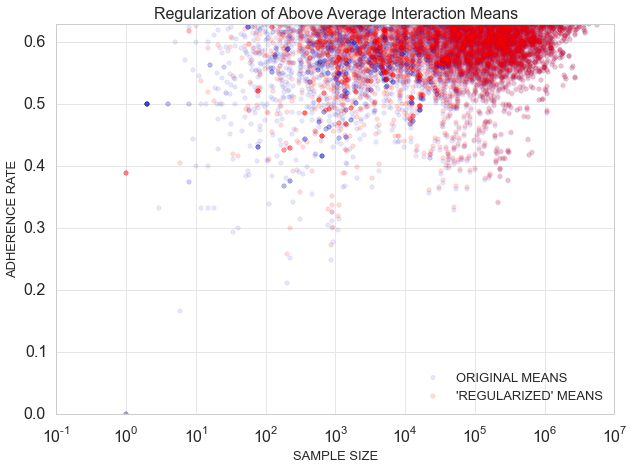

In [56]:
plt.figure(figsize=(10,7))
plt.scatter(int_df.COUNT, int_df.MEAN, alpha=0.1, label="ORIGINAL MEANS")
plt.scatter(int_df.COUNT, int_df.UPPER_BOUND, alpha=0.15, color='r', label="'REGULARIZED' MEANS")
plt.xscale('log')
plt.title("Regularization of Above Average Interaction Means", fontsize=16)
plt.xlabel('SAMPLE SIZE', fontsize=13)
plt.ylabel('ADHERENCE RATE', fontsize=13)
plt.legend(loc=4, fontsize=13)
plt.ylim(0.0, 0.63);

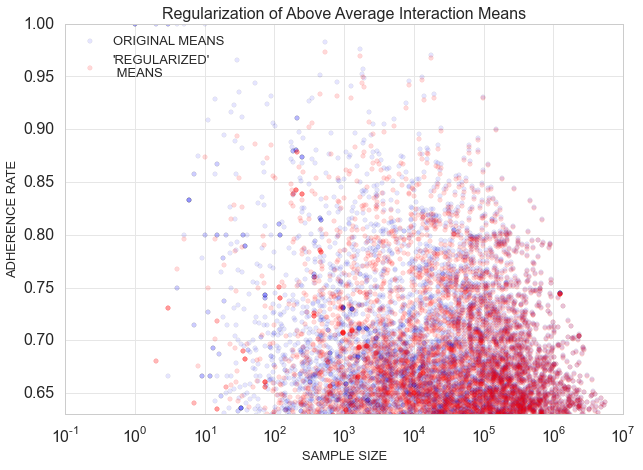

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(int_df.COUNT, int_df.MEAN, alpha=0.1, label="ORIGINAL MEANS")
plt.scatter(int_df.COUNT, int_df.LOWER_BOUND, alpha=0.15, color='r', label="'REGULARIZED'\n MEANS")
plt.xscale('log')
plt.title("Regularization of Above Average Interaction Means", fontsize=16)
plt.xlabel('SAMPLE SIZE', fontsize=13)
plt.ylabel('ADHERENCE RATE', fontsize=13)
plt.legend(loc=2, fontsize=13)
plt.ylim(0.63, 1);

Observing the two plots above, it is evident that the interation terms with smaller sample sizes were 'regularized' toward the mean, while the terms with large sample sizes continued with a similar adherence rate. To further 'regularize' the data, we could change the lower bound threshold to 97-99%, but for the purposes of this project we will utilize the 95% value.

#### DIFFERENCE FROM INDIVIDUAL CATEGORY VARIABLE MEANS

The 'regularized' means from the interactions are useful but often times, the interaction term's mean is influenced greatly by only one of the categories, so the interaction term does not add much more value that the individual category mean. In order to select the most insightful interaction terms, we want to choose the terms with the maximimum difference between the regularized mean and the maximum/minimum of the two individual adherence rates. 

Below we add two new columns to the dataframe `POS_VAR_DIFF` and `NEG_VAR_DIFF` for the differences between the regularized means and the maximum and minimum individual variable means respectively.

In [95]:
#Calculate percentage of participants applicable for each interaction term
int_df['PERC_TOT']=[x/float(all_records) for x in int_df['COUNT']]
small_df=df_i[tr_mask]
positive_new=small_df[small_df['RESPONSE']>0]

#Create library with individual category means
avgs={}
for col in cols:
    splitsnew=positive_new[col].value_counts()/small_df[col].value_counts()
    avgs[col]=splitsnew.to_dict()

#Add individual category means to dataframe
int_df['VAR1_AVG']=[avgs[i][j] for i,j in zip(int_df.VAR1, int_df.VAL1)]
int_df['VAR2_AVG']=[avgs[i][j] for i,j in zip(int_df.VAR2, int_df.VAL2)]

#Find differences between the maximum and minimum single categorical mean and regularized mean
int_df['POS_VAR_DIFF']=[k-max(i,j) for i,j,k in 
                        zip(int_df.VAR1_AVG, int_df.VAR2_AVG, int_df.LOWER_BOUND)]
int_df['NEG_VAR_DIFF']=[min(i,j)-k for i,j,k in 
                        zip(int_df.VAR1_AVG, int_df.VAR2_AVG, int_df.UPPER_BOUND)]

#### INTERACTION TERM SELECTION FOR LOGISTIC REGRESSION

Finally, since our data is already of a very large dimension, the number of interaction terms that we should consider in our Logistic Regression model is limited. For this reason, we selected the top and bottom 50 interaction terms that make up more than 3% of the training data as to be relevant to a greater proportion of the participants. The list of concatenated interaction names is stored in the list `inter_terms` for use in the logistic regression model.

In [54]:
int_df[(int_df['PERC_TOT']<0.99) & (int_df['PERC_TOT']>0.03)].sort(
    columns='POS_VAR_DIFF', ascending=False).head(10)

,VAR1,VAR2,VAL1,VAL2,MEAN,COUNT,VAR1_DESC,VAR2_DESC,STD_ERROR,LOWER_BOUND,PERC_TOT,VAR1_AVG,VAR2_AVG,UPPER_BOUND,NEG_VAR_DIFF,POS_VAR_DIFF,DIFF
5775,DIVISION,SERVSETD,9,5,0.709830,177806,PACIFIC,"REHAB/RES, LONG TERM (MORE THAN 30 DAYS)",0.001776,0.708054,0.030098,0.611808,0.624136,0.711606,-0.099798,0.083918,0.079502
6082,DIVISION,SUB1,8,2,0.787500,227934,MOUNTAIN,ALCOHOL,0.001414,0.786086,0.038584,0.689838,0.704319,0.788914,-0.099076,0.081767,0.157172
6167,DIVISION,ROUTE1,8,1,0.774082,244686,MOUNTAIN,ORAL,0.001395,0.772687,0.041420,0.689838,0.691209,0.775477,-0.085639,0.081478,0.143754
6496,DIVISION,PSYPROB,8,2,0.755047,214355,MOUNTAIN,NO,0.001533,0.753514,0.036285,0.689838,0.627093,0.756579,-0.129487,0.063676,0.124719
6402,DIVISION,NUMSUBS,8,1,0.754436,211672,MOUNTAIN,1,0.001544,0.752892,0.035831,0.689838,0.665665,0.755980,-0.090314,0.063054,0.124109
7224,SERVSETD,PRIMPAY,2,1,0.854013,180311,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",SELF-PAY,0.001372,0.852641,0.030522,0.791738,0.637735,0.855385,-0.217651,0.060903,0.223686
9087,SUB1,HLTHINS,2,1,0.768772,261249,ALCOHOL,"PRIVATE INSURANCE, BC/BS, HMO",0.001361,0.767411,0.044223,0.704319,0.708399,0.770133,-0.065814,0.059012,0.138445
6787,SERVSETD,SUB1,4,2,0.808637,259130,"REHAB/RES, SHORT TERM (30 DAYS OR FEWER)",ALCOHOL,0.001275,0.807362,0.043865,0.749014,0.704319,0.809912,-0.105593,0.058347,0.178309
3088,MARSTAT,PSOURCE,2,7,0.706600,281748,NOW MARRIED,COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI,0.001415,0.705184,0.047693,0.651161,0.652150,0.708015,-0.056854,0.053034,0.076272
950,AGE,SUB1,12,2,0.767140,203573,55 AND OVER,ALCOHOL,0.001546,0.765594,0.034460,0.712702,0.704319,0.768686,-0.064367,0.052893,0.136813


In [4]:
"""
Function
--------
make_inter_terms

Inputs
------
int_df : Dataframe made up of two way variable interations and descripive stats
perc_cutoff : minimum percent of total dataset to which the interaction is relevant 
num_pos : number of positive interaction terms to be considered 
num_neg  : number of negative interaction terms to be considered 
   
Returns
-------
all_ints_tup : list of tuples of interaction name descriptions ie [(GENDER_1, EDUC_2), ...]
"""
def make_inter_terms(int_df, perc_cutoff=0.03, num_pos=50, num_neg=50):
    all_ints_tup=[]
    #sort by lowest and highest interactions differentials, take 50 of each
    neg_ints=int_df[int_df['PERC_TOT']>perc_cutoff].sort(columns='NEG_VAR_DIFF', 
                                                         ascending=False).head(num_neg)
    pos_ints=int_df[int_df['PERC_TOT']>perc_cutoff].sort(columns='POS_VAR_DIFF', 
                                                         ascending=False).head(num_pos)
    ints=pd.concat([neg_ints, neg_ints])
    for i,j,k,l in zip(ints.VAR1, ints.VAL1, ints.VAR2,ints.VAL2):
        #Create concatenated interaction name
        int_tup=(i+"_"+str(j), k+"_"+str(l))
        all_ints_tup.append(int_tup)
    return all_ints_tup

In [5]:
#Populate list of interaction terms
inter_terms=make_inter_terms(int_df, perc_cutoff=0.03, num_pos=50, num_neg=50)

# 4. PREDICTION

## 4.1 BASELINE MODELS AND SCORING METHODS

While it is useful to have a binary prediction, sometimes it can be more useful to express the level of certainty of a prediction. A drug treatment program participant with a 51% probability of completing the program is very different than one with a 95% chance of completion. In the case of simple binary classification, these two individuals would be classified the same way. For this reason, the predicted variable for the following analysis is not only a binary prediction, but also a probability estimate.

#### LOG LOSS ####

The most common evaluation metric for probability estimates of binary outcomes is **log loss**. Log loss is the primary metric used used in this analysis in hyperparameter tuning and model optimization.

$\ell_{\text{log}} = \frac{1}{N}\sum_{i=1}^N {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$

where:

N : number of participants with predicted values
<br />
- $y_i$ : Actual outcome for participant i (0 or 1)
<br />
- $p_i$ : Predicted probability of successful outcome for participant i
<br />

#### ACCURACY ####

Binary classification can also be a useful tool because of its ease of interpretability. As our classes are relatively well balanced, **simple accuracy** is an adequate scoring metric for binary classification.
<br />
<br />

$$\text{accuracy}=\frac{\text{number of true positives}+\text{number of true negatives}}{\text{number of true positives}+\text{false positives} + \text{false negatives} + \text{true negatives}}$$



In [3]:
"""
Function
--------
logloss

Inputs
------
act : array of observed binary responses
pred : array of predicted probabilities 
   
Returns
-------
ll : Float of cumulative log loss (negative value where ll=0 signifies no error)
"""
#based on code from https://www.kaggle.com/wiki/LogarithmicLoss
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    
    #compute logloss function (vectorised)
    ll = sum(   act*sp.log(pred) + 
                sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * 1.0/len(act)
    return ll

In [4]:
"""
Function
--------
accuracy_from_probs

Inputs
------
probs : array of predicted probabilities
ytest : array of observed binary responses
cutoff : Cutoff for predicted classification where 
    x>cutoff yields 1 and x<=cutoff yields 0
   
Returns
-------
Float of predictive accuracy
"""
def accuracy_from_probs(probs, ytest, cutoff=0.5):
    guesses=[1 if i>0.50 else 0 for i in probs]
    correct=[1 if i==j else 0 for i,j in zip(guesses, ytest)]
    return np.sum(correct)/float(len(ytest))

### BASELINE MODELS

Predictive modeling is time and resource intensive process, so we must ensure that the process is worth completing. To do this, the predictive models should provide a significant improvement upon simplistic baseline models that require nor time nor resources.

#### ALL PARTICIPANTS SUCCEED WITH 100% PROBABILITY
The first simplistic model is to assume that all the participants will adhere to the treatment program with 100% probability.

In [13]:
ytest=df_i['RESPONSE'].values[te_mask]
baseline_all=np.ones(len(ytest))
score=logloss(ytest, baseline_all)
print "Log-loss: %0.2f" %(score)
print "Accuracy score: %0.2f" %(accuracy_from_probs(baseline_all, ytest, cutoff=0.5))

Log-loss: -12.77
Accuracy score: 0.63


#### ALL PARTICIPANTS SUCCEED WITH 63% PROBABILITY
The second and more meaningful simplistic baseline model is to assume that all the participants will adhere to the treatment program with 63% probability. 63% probability was chosen as it is the adherence rate of the entire dataset.

In [14]:
baseline_mean=np.ones(len(ytest))*0.63
score=logloss(ytest, baseline_mean)
print "Log-loss: %0.2f" %(score)
print "Accuracy score: %0.2f" %(accuracy_from_probs(baseline_mean, ytest, cutoff=0.5))

Log-loss: -0.66
Accuracy score: 0.63


The accuracy score is the same for both baseline models, but the second had a significantly better log loss score as it is much closer to 0.

## 4.2 RANDOM FOREST

As all features are categorical and our target output are probabilities, the Random Forest classifier was an obvious choice for one of the models in the ensemble. As the scikit-learn Random Forest package automatically recognizes categorical data, data processing procedures such as one-hot-encoding were not required. 

The following functions define the cross-validation, classification, and subsampling procedures used in all of the classification models.

### 4.2.1 TRAINING

In [5]:
'''
Function
--------
bal_subs_data

Inputs
------
Xtrain : a samples-features training data matrix in the scikit-learn style
ytrain: the response vector of 1s and 0s for traning set
subsample : number of samples per class (creates balanced split) in subsample for training
   
Returns
-------
Subsampled and balanced training matrices.
'''
def bal_subs_data(Xtrain, ytrain, subsample):
    #based on code from hw 3
    jtrain=np.arange(0, ytrain.shape[0])
    n_pos=len(jtrain[ytrain==1])
    n_neg=len(jtrain[ytrain==0])
    np.random.seed(50)
    ineg = np.random.choice(jtrain[ytrain==0], subsample, replace=False)
    ipos = np.random.choice(jtrain[ytrain==1], subsample, replace=False)
    alli=np.concatenate((ipos, ineg))
    return Xtrain[alli], ytrain[alli]
    

In [7]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: dictionary with key=parameter names and value=list of parameter values
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s
n_folds: the number of cross-validation folds (default 5)
score_func: Scoring function to be used in cross validation ie. "log-loss"
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
Based on code from CS109 homework 3 2015. Performs cross validation
"""
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
def cv_optimize(clf, params,  X, y, n_jobs=1, n_iter=10, n_folds=5, 
                score_func=None, random_cv=False):
    
    #enable use of custom scoring system
    if not random_cv:
        if score_func:
            cv = GridSearchCV(clf, param_grid=params, cv=n_folds, 
                              n_jobs=n_jobs, scoring=score_func)
        else:
            cv = GridSearchCV(clf, param_grid=params, n_jobs=n_jobs, cv=n_folds)
    else:
        if score_func:
            cv = RandomizedSearchCV(clf, param_distributions=params, n_iter=n_iter, 
                                    scoring=score_func, n_jobs=n_jobs, cv=n_folds, 
                                    random_state=50)
        else:
            cv = RandomizedSearchCV(clf, param_distributions=params, n_iter=n_iter, 
                                    n_jobs=n_jobs, cv=n_folds, random_state=50)
        print 'RANDOMIZED SEARCH'
            
    cv.fit(X, y)
    print "BEST", cv.best_params_, cv.best_score_, cv.grid_scores_
    best = cv.best_estimator_
    return best

In [8]:
"""
Function
--------
do_classify

Inputs
------
clf : instance of scikit learn classifier
params : dictionary with key=parameter names and value=list of parameter values 
indf : Dataframe with training and test data
featurenames : list of features to be used in X matrix
targetname : string name of reponse variable column
tr_mask : Boolean training mask (list)
te_mask : Boolean test mask (list)
score_func : Scoring function to be used in cross validation ie. "log-loss"
n_folds : number of cross validation folds
n_jobs=1 : number of jobs for parallel processing
random_cv : Boolean describing if random (not grid) cross validation will be used
n_iter=10 : number of iterations for random cross validation
subsample : number of samples per class (creates balanced split) in subsample for training
   
Returns
-------
clf : fit instance of scikit learn classifier
probs : list of predicted probabilities on test set
ytest : actual response values from test set
     
Notes
-----
Based on code from CS109 homework 3. Performs classification process.
"""
from sklearn.metrics import confusion_matrix
def do_classify(clf, params, indf, featurenames, targetname, tr_mask, te_mask,
                score_func=None, n_folds=5, n_jobs=1, random_cv=False, n_iter=10, 
                subsample=False):
    #create train and test matrices from test and training masks
    Xtrain=indf[featurenames][tr_mask].values
    Xtest=indf[featurenames][te_mask].values
    ytrain=indf[targetname][tr_mask].values
    ytest=indf[targetname][te_mask].values
    
    if subsample:
        Xtrain, ytrain = bal_subs_data(Xtrain, ytrain, subsample)
    if params:
        #if parameters for cross validation are provided, perform cross validation
        clf = cv_optimize(clf, params, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, 
                          random_cv=random_cv, score_func=score_func, n_iter=n_iter)
    #train model with best parameters from cross validation
    clf=clf.fit(Xtrain, ytrain)
     
    #predict class probabilities from fit model and return log-loss value of predictions
    probs=clf.predict_proba(Xtest)[:, 1]
    score=logloss(ytest, probs)
    print "FINAL LOG LOSS: %0.4f" %(score)
    return clf, probs, ytest

Even though in the EDA analysis we identified the 'importance' of each feature, we have included all of the features in the analysis as the random forest naturally performs feature selection.

Due to limited computational resources and high dimensional data, the hyperparameter `n_estimators` was limited to 100 in cross-validation. Furthermore, a balanced subset of 400,000 participants was used for the training of the model. As is common practice, the number of features considered in each tree of the model was the scikit-learn default of $\sqrt{N_{features}}$.

In [51]:
from sklearn.ensemble import RandomForestClassifier

#instantiate random forest classifier
in_clf=RandomForestClassifier(n_jobs=1, random_state=50)

# GRID CV CALL
gridparam={"n_estimators": [10, 40, 75, 100]}
clf_rf, probs_rf, ytest= do_classify(in_clf, gridparam, df_i, features, 'RESPONSE', 
                                     tr_mask, te_mask, score_func='log_loss', n_folds=5, 
                                     n_jobs=1, random_cv=False, subsample=200000)


BEST {'n_estimators': 100} -0.613414410985 [mean: -0.91732, std: 0.01057, params: {'n_estimators': 10}, mean: -0.62796, std: 0.00249, params: {'n_estimators': 40}, mean: -0.61668, std: 0.00130, params: {'n_estimators': 75}, mean: -0.61341, std: 0.00141, params: {'n_estimators': 100}]
FINAL LOG LOSS: -0.6125


### 4.2.2 PERFORMANCE

As expected, with a large data set of 400,000 samples, a Random Forest with a relatively small number of trees generalizes well to test data. In our case, there was a very insignificant difference in log loss between the random forest with 10 trees and 100 trees. This gives us confidence that increasing the number of trees above 100 would yield insignificant improvements.

#### FEATURE IMPORTANCES

Random forests are not only useful for prediction purposes, but also to identify variable importances. Due to the training process of the random forest in which the splits are determined by minimizing the node impurity, it is possible to determine which variables most decrease the impurity in the tree. 

However, these importances are biased in that they prefer variables with a larger number of categories. Nonetheless, these importances can assist in the analysis of causal relationships between the variables and the response.

In [6]:
"""
Function
--------
feature_imp_plot

Inputs
------
classifier_name : String description of the classifier being analysed
features: list of feature names
importances: list of numerical feature importances
   
Returns
-------
N/A
     
Notes
-----
Creates a sorted plot of feature importances
"""
def feature_imp_plot(classifier_name, features, importances):
    with plt.style.context(('fivethirtyeight')):
        #create dataframe from input data
        plt.figure(figsize=(10,7))
        feat_imp=pd.DataFrame({'Features':features, "Importance":importances})

        #sort variables according to importance
        feat_imp_sort=feat_imp.sort("Importance", ascending=True)
        feat_imp_sort.reset_index(inplace=True)

        #create plot
        plt.barh(range(len(features)), feat_imp_sort.Importance)
        #modify tick labels
        yticklocations = np.array(range(len(features)))+0.5
        plt.yticks(yticklocations, feat_imp_sort.Features, fontsize=11)
        plt.xticks(fontsize=12)

        plt.title(classifier_name+" FEATURE IMPORTANCES", fontsize=15)
        plt.xlabel("IMPORTANCE", fontsize=13)
        plt.margins(0.005);

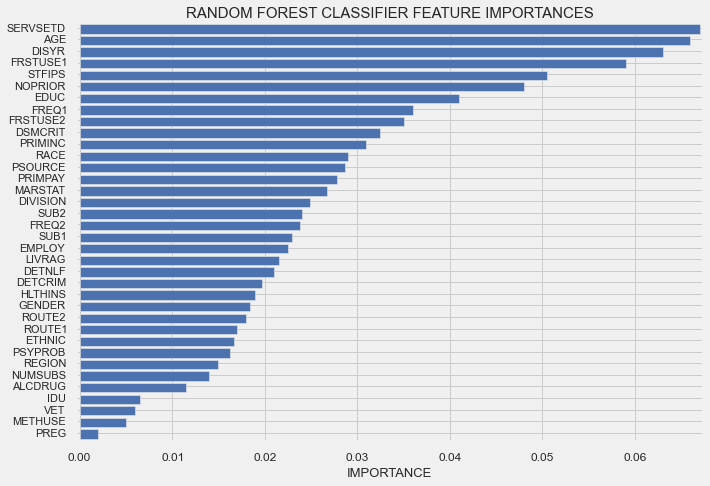

In [30]:
feature_imp_plot('RANDOM FOREST CLASSIFIER', features, clf_rf.feature_importances_)

### 4.2.3 CALIBRATION

As seen above, the log loss value of the prediction on the test set was an improvement upon the baseline model. To further evaluate the performance of the model, we will check to see if it is properly calibrated. An example of calibration is: do the participants who are predicted to have a 90% probability of adherence adhere 90% of the time? For a perfectly calibrated model, this will be the case for all probability values.

In [7]:
"""
Function
--------
calibration_plot

Inputs
------
probs : array of predicted probabilities
ytest : array of observed binary responses
   
Returns
-------
N/A
     
Notes
-----
Creates a plot of classifier calibration
Adapted from code from CS109 hw 5
"""
def calibration_plot(prob, ytest):
    data = pd.DataFrame(dict(prob=prob, outcome=ytest))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(+)")
    
    #the distribution of P(+)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(+)")
    plt.ylabel("Number")

Log-loss: -0.61
Accuracy score: 0.66


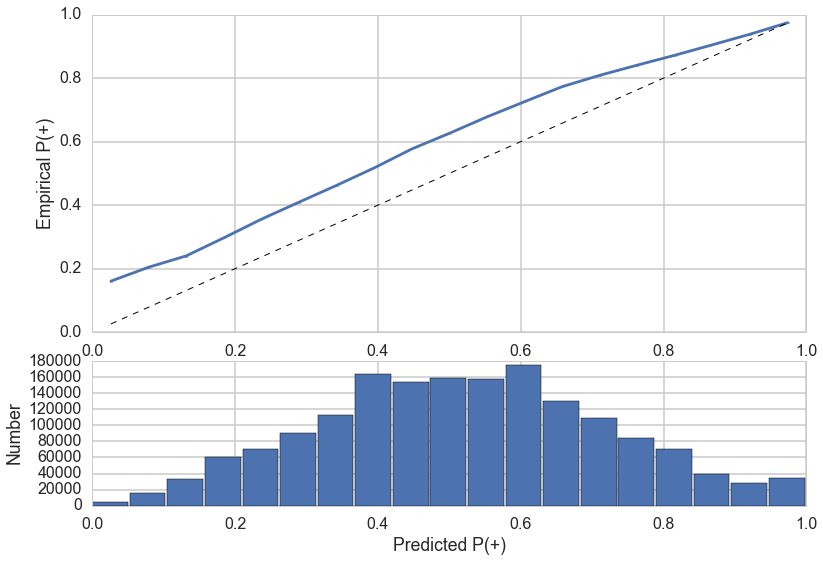

In [56]:
#Observe log-loss, accuracy and calibration of fitted model
score=logloss(ytest, probs_rf)
print "Log-loss: %0.2f" %(score)
print "Accuracy score: %0.2f" %(accuracy_from_probs(probs_rf, ytest, cutoff=0.5))
calibration_plot(probs_rf, ytest)

As we can see from the above plot, the random forest classifier significantly underestimates the probability of adherence as the entire curve falls above the 'perfectly calibrated' line. To help improve these posterior probability estimates, we perform calibration on the model. For this project isotonic calibration was performed which fits a piecewise-constant non-decreasing function to the data for calibrating. As not to introduce unwanted bias, the calibration is performed on a validation set disjunct from the training and final test sets.

(More information relating to isotonic and other calibration methods at this [link](http://www.cs.cornell.edu/~caruana/niculescu.scldbst.crc.rev4.pdf))

In [10]:
"""
Function
--------
make_val_sets

Inputs
------
df : Pandas DataFrame to be split into arrays to be processed by scikit learn 
features : list of relevant features for X arrays
val_mask : Array boolean mask for original validation set
response : String name of response variable (default:'RESPONSE') 
split : Float of fraction of calibration/stacked logreg sets
   
Returns
-------
X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr

Notes
-------
Splits validation set into two parts for calibration and stacked logistic regression
"""
from sklearn.cross_validation import train_test_split
def make_val_sets(df, features, val_mask, response='RESPONSE', split=0.5):
    X=df[features][val_mask].values
    y=df[response][val_mask].values
    X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr = train_test_split(X, y, test_size=0.5, 
                                                                  random_state=50)
    return X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr

In [11]:
"""
Function
--------
do_calibration

Inputs
------
clf : scikit learn classifier instance 
X_cal_tr : array for features data used in fitting calibration
y_cal_tr : array for response variable used in fitting calibration
x_cal_test : array of features data to be used to predict probabilities
cv : number of cross validation folds for calibration
method : method of classifier calbration (default : 'isotonic')
   
Returns
-------
clf : new calibrated classifier instance
prob_pos_calibrated : array of calibrated probabilities of positive response
"""
from sklearn.calibration import CalibratedClassifierCV
def do_calibration(clf, X_cal_tr, y_cal_tr, x_cal_test, cv=5, method='isotonic'):
    #instantiate calibrator
    clf = CalibratedClassifierCV(clf, cv=cv, method=method)
    
    #fit calibrator to validation data
    clf.fit(X_cal_tr, y_cal_tr)
    
    #predict calibrated posterior probabilities
    prob_pos_calibrated = clf.predict_proba(x_cal_test)[:, 1]
    return clf, prob_pos_calibrated

Here we calibrate the random forest classifier using half of the validation set for training of the isotonic calibration. Half of the validation set is about 400,000 samples which is sufficient to obtain a good fit. We test the calibration on the other half of the validation set with the output being new calibrated probabilities. These predictions will be part of the training data for the stacked logistic regression.

In [57]:
#create split of validation set for calibration and 'stacked' logistic regression ensemble
X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr = make_val_sets(df_i, features, val_mask, 
                                                           response='RESPONSE', split=0.5)

#perform isotonic calibration on the random forest classifier
clf_rf_cal, rf_prob_cal=do_calibration(clf_rf, X_cal_tr, y_cal_tr, 
                                       X_stack_tr, cv=5, method='isotonic')

#Create dataframe of 'features' and 'response' for training of stacked logistic regression 
val_predictions=pd.DataFrame({'y':y_stack_tr, 'RF':rf_prob_cal})

### 4.2.4 CALIBRATED MODEL PERFORMANCE

Log-loss of calibrated model: -0.58
Accuracy score of calibrated model: 0.69


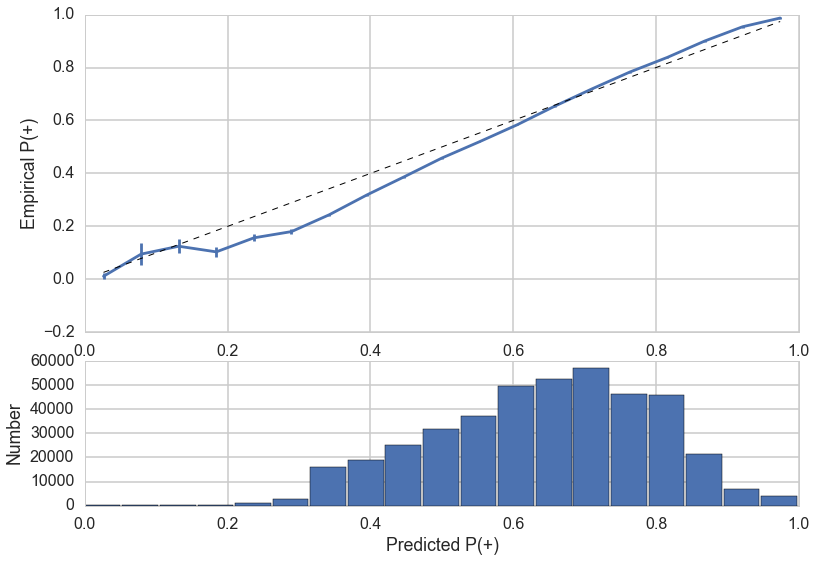

In [58]:
#Observe log-loss, accuracy and calibration of calibrated model
score=logloss(y_stack_tr, rf_prob_cal)
print "Log-loss of calibrated model: %0.2f" %(score)
print "Accuracy score of calibrated model: %0.2f" %(accuracy_from_probs(rf_prob_cal, y_stack_tr, 
                                                                        cutoff=0.5))
calibration_plot(rf_prob_cal, y_stack_tr)

After performing calibration, we see a significant improvement in the log-loss and accuracy values as well as in the calibration plot as the curve is much closer to the "perfectly calibrated" line.

We then make calibrated predictions on the test set that will be used as part of the final prediction using the trained stacked logistic regression.

In [63]:
#Predict probabilities on test set with calibrated model
rf_test_prob = clf_rf_cal.predict_proba(df_i[features][te_mask].values)[:, 1]
#Create dataframe of 'features' for testing of stacked logistic regression 
test_predictions=pd.DataFrame({'y':ytest, 'RF_CAL':rf_test_prob})

## 4.3 REGULARIZED 'ELASTIC NET' LOGISTIC REGRESSION 

Perhaps the most commonly used binary classification technique is the logistic regression. Logistic regression is a powerful tool because of its interpretability and ability to output posterior probability estimates. Logistic regression (with regularization) can be quite robust. However, shortcomings of the method include the restricted to a linear decision boundary.

$$\operatorname{logit}(\mathbb{E}[Y_i\mid x_{1,i},\ldots,x_{m,i}]) = \operatorname{logit}(p_i)=\ln\left(\frac{p_i}{1-p_i}\right) = \beta_0 + \beta_1 x_{1,i} + \cdots + \beta_m x_{m,i}$$

Where random forests naturally consider non-linear interactions between variables, logistic regression does not. For this reason, in this analysis we include the top and bottom 50 interactions between two variables that correlate in absolute terms with the response variable. 



### 4.3.1 DATA PREPARATION

Unlike the Random Forest classifier, logistic regression does not handle columns that contain categorical data. In order to process categorial data, the features must be **one-hot-encoded** which creates N-1 columns where N is the number of unique categories in the original column. For example, a column with three unique categories is transformed into two columns with binary values.

In [18]:
#convert any columns that may be floats to ints
for i in features:
    if df_i[i].dtypes=='float64':
        df_i[i]=df_i[i].astype(int)

#Create new dataframe to be one-hot-encoded for logistic regression
features_and_resp=features+[u'RESPONSE']
df_lr=df_i[features_and_resp]
df_lr=pd.get_dummies(df_lr, prefix=None, prefix_sep='_', columns=features, 
                     dummy_na=False, sparse=True)

#Add new columns to dataframe for interaction terms defined in exploratory data analysis
for i in inter_terms:
    #create concatenated label
    new_col=i[0]+'_'+i[1]
    #multiply two individual columns to form interaction column
    df_lr[new_col]=df_lr[i[0]] * df_lr[i[1]]
    
#With one hot encoding you only include N-1 columns where N is the 
#number of unique categories, where the get_dummies method returns N columns
#This code drops the column of the first occurance of the variable
for i in features:
    for j in df_lr.columns:
        if i in j:
            df_lr.drop(j, inplace=True, axis=1)
            break


Here we check the final shape of the feature/response matrix and sparsity of the first 10 columns.

In [135]:
df_lr.ftypes[:10]

RESPONSE         int64:dense
DISYR_2007    float64:sparse
DISYR_2008    float64:sparse
DISYR_2009    float64:sparse
DISYR_2010    float64:sparse
DISYR_2011    float64:sparse
AGE_3         float64:sparse
AGE_4         float64:sparse
AGE_5         float64:sparse
AGE_6         float64:sparse
dtype: object

In [133]:
df_lr.shape

(8439258, 306)

### 4.3.2 OPTIMIZATION METHOD - STOCHASTIC GRADIENT DESCENT

Since we have high dimensional sparse data, an efficient optimization method for logistic regression is **Stochastic Gradient Descent (SGD)**. Typically, the optimization method requires feature scaling (or standardization) of the dataset. Since the features are entirely binary with values of 0 and 1, no futher standardization is needed.

Logistic regression with SGD can be implemented with L2 or L1 regularization or 'Elastic-Net' which is a combination of the two methods.

$$\hat\beta = arg min_\beta ||y-X\beta||^2 + \lambda_2||\beta||^2 + \lambda_1||\beta||$$

where:

$$y = \operatorname{logit}(p_i)$$


with the scikit-learn implementation:

$$\hat\beta = arg min_\beta\frac{1}{2 N_{samples}} ||y - X\beta||^2 + \alpha  (\lambda_1 ratio) * ||\beta||+ \frac{1}{2} \alpha (1 - (\lambda_1 ratio)) * ||\beta||^2$$

where:

$$\alpha = \lambda_2+\lambda_1$$
$$\lambda_1 ratio = \frac{\lambda_1}{\lambda_1+\lambda_2}$$

This method was attractive because of the ability to test the effect of Lasso regularization ($\lambda_1 ratio$ = 1), Ridge regularization ($\lambda_1 ratio$ = 0), and a mixture between the two. The ideal values of these hyperparameters for this dataset are determined through cross validation.

### 4.3.3 TRAINING

SGD requires the input of the parameter `n_iter` which is the number of iterations in the gradient descent optimization process. The scikit-learn documentation gives the following guidance on selecting the value for this parameter.

>Empirically, we found that SGD converges after observing approx. 10^6 training samples. Thus, a reasonable first guess for the number of iterations is `n_iter = np.ceil(10**6 / n)`, where n is the size of the training set. (source: http://scikit-learn.org/stable/modules/sgd.html)

In [16]:
from sklearn.linear_model import SGDClassifier
#instantiate SGD logistic regression classifier
clf_sgd=SGDClassifier(loss='log', penalty='elasticnet', n_iter=5, random_state=50)

#define list of 'feature' names
sgd_feat=list(df_lr.columns)
sgd_feat.remove(u'RESPONSE')

#define parameter grid for cross-validation
gridparam={"alpha": [0.0001, 0.001, 0.01,1], "l1_ratio" : [0, 0.15, 0.5, 0.75, 1]}

#perform cross validation on reduced dataset
clf_sgd, probs_sgd, ytest= do_classify(clf_sgd, gridparam, df_lr, sgd_feat, 'RESPONSE', 
                                       tr_mask, te_mask, score_func='log_loss', n_folds=5, 
                                       n_jobs=1, random_cv=False, subsample=50000)

BEST {'alpha': 0.001, 'l1_ratio': 0.15} -0.63287577959 [mean: -0.70638, std: 0.01277, params: {'alpha': 0.0001, 'l1_ratio': 0}, mean: -0.68186, std: 0.01055, params: {'alpha': 0.0001, 'l1_ratio': 0.15}, mean: -0.67127, std: 0.00827, params: {'alpha': 0.0001, 'l1_ratio': 0.5}, mean: -0.66876, std: 0.00730, params: {'alpha': 0.0001, 'l1_ratio': 0.75}, mean: -0.66650, std: 0.00730, params: {'alpha': 0.0001, 'l1_ratio': 1}, mean: -0.63573, std: 0.00183, params: {'alpha': 0.001, 'l1_ratio': 0}, mean: -0.63288, std: 0.00152, params: {'alpha': 0.001, 'l1_ratio': 0.15}, mean: -0.63337, std: 0.00143, params: {'alpha': 0.001, 'l1_ratio': 0.5}, mean: -0.63373, std: 0.00188, params: {'alpha': 0.001, 'l1_ratio': 0.75}, mean: -0.63414, std: 0.00170, params: {'alpha': 0.001, 'l1_ratio': 1}, mean: -0.63402, std: 0.00137, params: {'alpha': 0.01, 'l1_ratio': 0}, mean: -0.64192, std: 0.00138, params: {'alpha': 0.01, 'l1_ratio': 0.15}, mean: -0.65231, std: 0.00123, params: {'alpha': 0.01, 'l1_ratio': 0.5}

The two hyperparameters tuned in the cross validation were the regularization parameter alpha and the elastic net parameter L1 ratio. These hyperparameters were tuned on a reduced sample of 100,000 and five SGD iterations while the final model is fit on a sample of 400,000 and four SGD iterations. The selected value of the L1 ratio of 0.15 indicates a higher effect from Ridge regularization than Lasso.

### 4.3.4 PERFORMANCE

In [27]:
#define the parameters from the best model of the cross validation
alpha=clf_sgd.alpha
l1_ratio=clf_sgd.l1_ratio

#redefine SGD classifier instance with 'best' parameters
clf_sgd=SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha, 
                      l1_ratio=l1_ratio, n_iter=4, random_state=50)

#perform fit on larger sample size using 'best' parameters
clf_sgd, probs_sgd, ytest= do_classify(clf_sgd, False, df_lr, sgd_feat, 'RESPONSE', 
                                      tr_mask, te_mask, score_func='log_loss', n_jobs=1, 
                                      random_cv=False, subsample=200000)

FINAL LOG LOSS: -0.6264


#### FEATURE IMPORTANCES

Using the coefficient magnitudes of the logistic regression, we can have another interpretation of the 'feature importances'.

In [35]:
"""
Function
--------
nonzero_coeff

Inputs
------
clf : scikit learn classifier instance 
features: list of feature names
   
Returns
-------
Sorted DataFrame with feature names and coeff values

Notes
-------
Based on code from CS109 hw3
"""
def nonzero_coeff(clf, features):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(Feature=features, coef=clf.coef_[0], 
                             abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef',
                                                                              ascending=False)

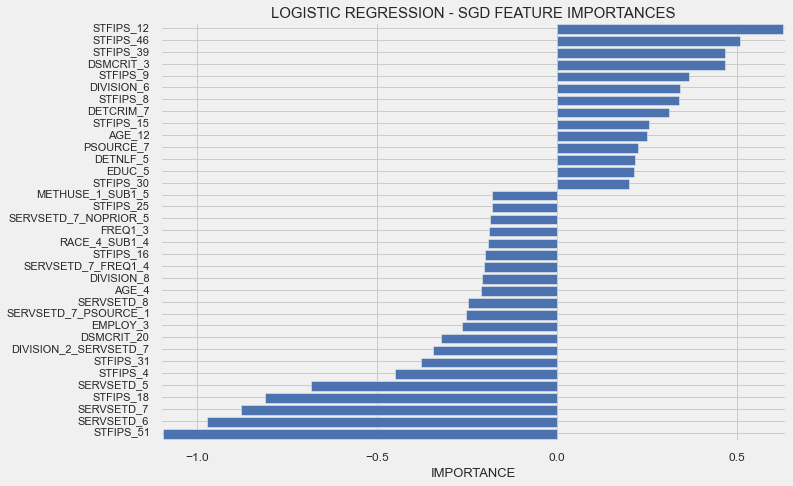

In [36]:
variable_importances=nonzero_coeff(clf_sgd,sgd_feat)
variable_importances.set_index("Feature", inplace=True)
#take top 35 features
small_vi=variable_importances.head(35)
#plot the 'importances' of the logistic regression features
feature_imp_plot('LOGISTIC REGRESSION - SGD', small_vi.index, small_vi.coef)

In general, observing the top 35 coefficients by magnitude, we can see the importance of the geographic variables of State (`STFIPS`) and Division (`DIVISION`) as well as the treatment program type (`SERVSETD`). 

### 4.3.5 CALIBRATION

As performed on the random forest classifier, we evaluate the model by observing its calibration.

Log-loss: -0.63
Accuracy score: 0.65


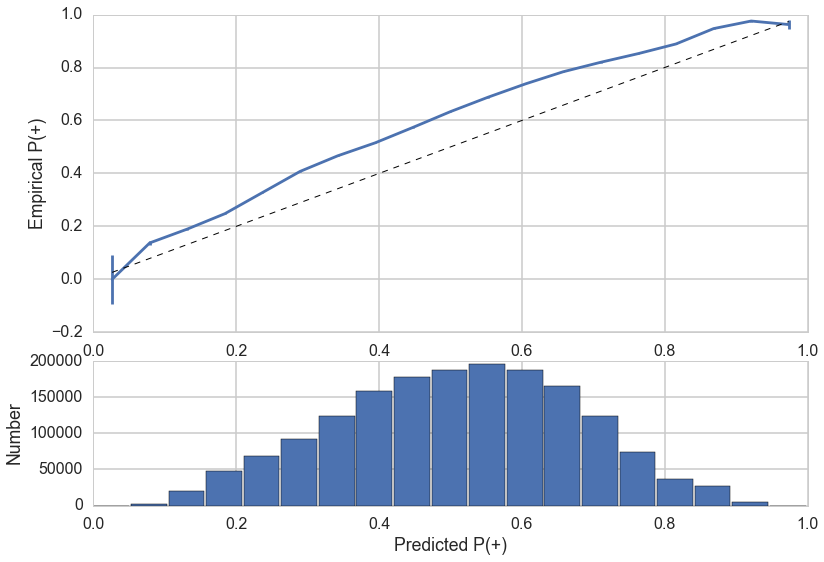

In [36]:
#Observe log-loss, accuracy and calibration of fitted model
score=logloss(ytest, probs_sgd)
print "Log-loss: %0.2f" %(score)
print "Accuracy score: %0.2f" %(accuracy_from_probs(probs_sgd, ytest, cutoff=0.5))
calibration_plot(probs_sgd, ytest)

The accuracy and log-loss score are barely better than the 63% baseline case. Also, observing the calibration plot, it is evident that the model is underestimating the probability of adherence. Now we will see if the predictive power of the model is improved after calibration.

In [40]:
#create split of validation set for calibration and 'stacked' logistic regression ensemble
X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr = make_val_sets(df_lr, sgd_feat, val_mask, 
                                                           response='RESPONSE', split=0.5)

#perform isotonic calibration on the random forest classifier
clf_sgd_cal, sgd_prob_cal=do_calibration(clf_sgd, X_cal_tr, y_cal_tr, 
                                         X_stack_tr, cv=5, method='isotonic')

#save predictions to val_predictions dataframe of 'features' and 'response' 
#for training of stacked logistic regression 
val_predictions['LR']=sgd_prob_cal

### 4.3.6 CALIBRATED MODEL PERFORMANCE

We then make calibrated predictions on the test set that will be used as part of the final prediction using the trained stacked logistic regression.

In [44]:
#Predict probabilities on test set with calibrated model
sgd_test_prob = clf_sgd_cal.predict_proba(df_lr[sgd_feat][te_mask].values)[:, 1]

#Add to dataframe of 'features' for testing of stacked logistic regression
test_predictions['LR_CAL']=sgd_test_prob

Log-loss of calibrated model: -0.59
Accuracy score of calibrated model: 0.68


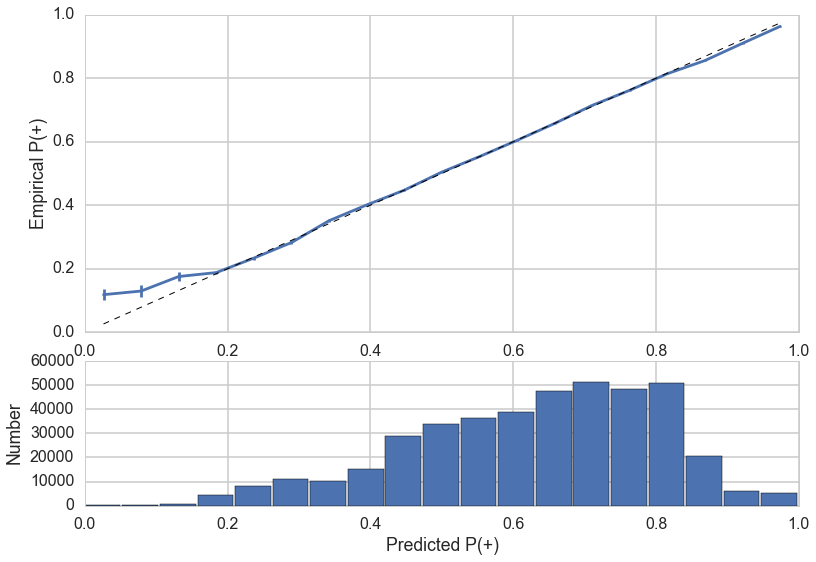

In [45]:
#Observe log-loss, accuracy and calibration of calibrated model
score=logloss(y_stack_tr, sgd_prob_cal)
print "Log-loss of calibrated model: %0.2f" %(score)
print "Accuracy score of calibrated model: %0.2f" %(accuracy_from_probs(sgd_prob_cal, 
                                                                        y_stack_tr, cutoff=0.5))
calibration_plot(sgd_prob_cal, y_stack_tr)

After calibration, the model's predictive power is improved significantly. The log-loss fell below -0.6 and had a classification accuracy of 68%: both significant improvements upon the baseline cases.

## 4.4 GRADIENT BOOSTED TREE CLASSIFIER

For the final model to be combined in the ensemble we implemented the Gradient Boosted Trees Classifier (GBT). Gradient boosted trees have been gaining popularity for many reasons. While GBT shares many of the benefits of random forests, it also **trains faster** because the trees are not fully grown and has shown **better performance than random forests** (see [link](https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf) for details).



### 4.4.1 TRAINING

#### HYPERPARAMETER SELECTION

An effective GBT model requires more tuning of hyperparameters than a random forest classifier.  For this reason, **random grid search cross-validation** was implemented for hyperparameter tuning. The model trained on twenty iterations, randomly varying the parameters of `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`, and `n_estimators`. The model was trained on a balanced subset of 400,000 program participants.

In [19]:
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier

np.random.RandomState(seed=50)
parameters = {"max_depth": randint(1, 10),
              "max_features": [None, 10, 20, 30],
              "min_samples_split": randint(1, 11),
              "min_samples_leaf": randint(1, 11),
              "n_estimators": [100, 130, 150]}

clf_GBT = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, random_state=50)
clf_GBT, probs_GBT, ytest= do_classify(clf_GBT, parameters, df_i, features, 'RESPONSE', tr_mask, 
                                       te_mask, score_func='log_loss', n_folds=5, n_jobs=1, 
                                       random_cv=True, subsample=100000, n_iter=20)


RANDOMIZED SEARCH
BEST {'max_features': None, 'min_samples_split': 4, 'n_estimators': 150, 'max_depth': 8, 'min_samples_leaf': 10} -0.599357485923 [mean: -0.62223, std: 0.00154, params: {'max_features': None, 'min_samples_split': 8, 'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 3}, mean: -0.61214, std: 0.00140, params: {'max_features': 30, 'min_samples_split': 1, 'n_estimators': 130, 'max_depth': 4, 'min_samples_leaf': 2}, mean: -0.60385, std: 0.00119, params: {'max_features': 10, 'min_samples_split': 10, 'n_estimators': 150, 'max_depth': 6, 'min_samples_leaf': 7}, mean: -0.59936, std: 0.00112, params: {'max_features': None, 'min_samples_split': 4, 'n_estimators': 150, 'max_depth': 8, 'min_samples_leaf': 10}, mean: -0.60797, std: 0.00135, params: {'max_features': 10, 'min_samples_split': 9, 'n_estimators': 150, 'max_depth': 5, 'min_samples_leaf': 9}, mean: -0.60084, std: 0.00122, params: {'max_features': 20, 'min_samples_split': 2, 'n_estimators': 130, 'max_depth': 7, 'min_s

### 4.4.2 PERFORMANCE

The GBT best model performed better than the previous two uncalibrated models with a **log-loss score less than -0.6**. The hyperparameters corresponding to the best model are:

- `max_features`: None
- `min_samples_split`: 4
- `n_estimators`: 150
- `max_depth`: 8
- `min_samples_leaf`: 10


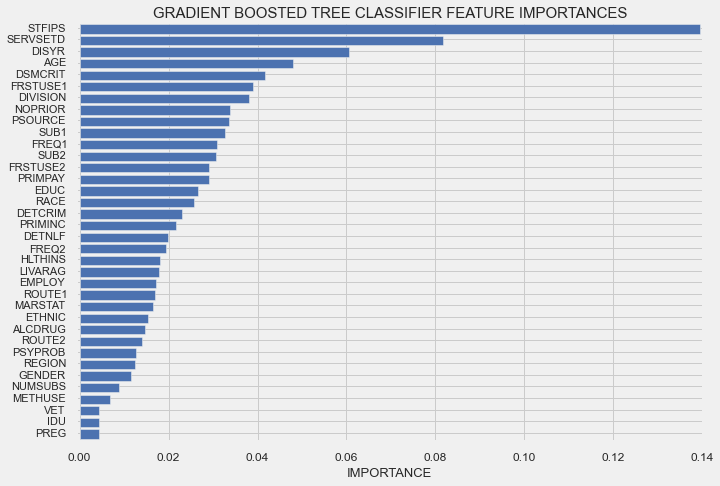

In [10]:
feature_imp_plot('GRADIENT BOOSTED TREE CLASSIFIER', features, clf_GBT.feature_importances_)

As was the case for the other two models, the most important features are geographic and treatment program type.

### 4.4.3 CALIBRATION

In [15]:
probs_GBT=clf_GBT.predict_proba(df_i[features][te_mask].values)[:, 1]

Log-loss: -0.60
Accuracy score: 0.67


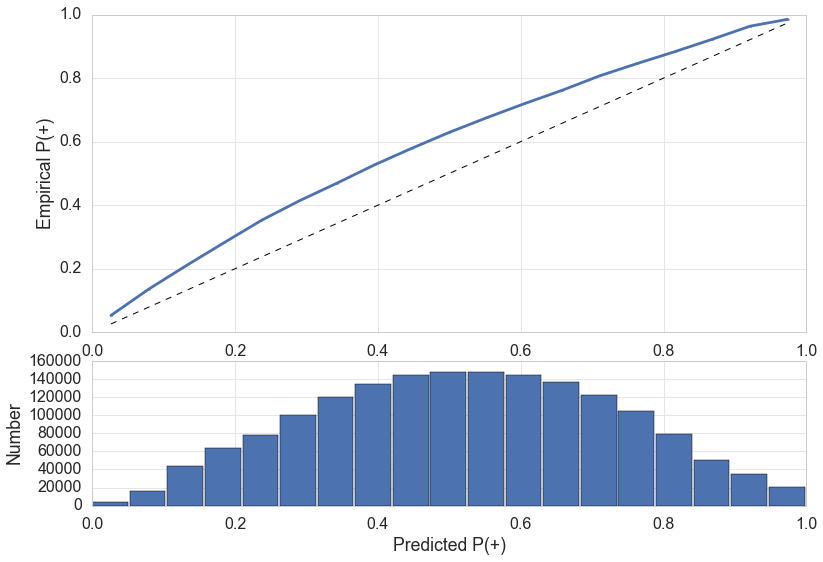

In [16]:
#Observe log-loss, accuracy and calibration of fitted model
score=logloss(ytest, probs_GBT)
print "Log-loss: %0.2f" %(score)
print "Accuracy score: %0.2f" %(accuracy_from_probs(probs_GBT, ytest, cutoff=0.5))
calibration_plot(probs_GBT, ytest)

Similar to the previous two models, the uncalibrated GBT model underestimates the probability of program adherence. The calibration process could improve upon the the well performing GBT model.

In [27]:
#create split of validation set for calibration and 'stacked' logistic regression ensemble
X_cal_tr, X_stack_tr, y_cal_tr, y_stack_tr = make_val_sets(df_i, features, val_mask, 
                                                           response='RESPONSE', split=0.5)

#perform isotonic calibration on the random forest classifier
clf_GBT_cal, GBT_prob_cal=do_calibration(clf_GBT, X_cal_tr, y_cal_tr, X_stack_tr, 
                                         cv=5, method='isotonic')

#save predictions to val_predictions dataframe of 'features' and 'response' 
#for training of stacked logistic regression 
val_predictions['GBT']=GBT_prob_cal

### 4.4.4 CALIBRATED MODEL PERFORMANCE

We now make calibrated predictions on the test set that will be used as part of the final prediction using the trained stacked logistic regression.

In [34]:
#Predict probabilities on test set with calibrated model
GBT_test_prob = clf_GBT_cal.predict_proba(df_i[features][te_mask].values)[:, 1]

#Add to dataframe of 'features' for testing of stacked logistic regression
test_predictions['GBT_CAL']=GBT_test_prob

Log-loss of calibrated model: -0.57
Accuracy score of calibrated model: 0.70


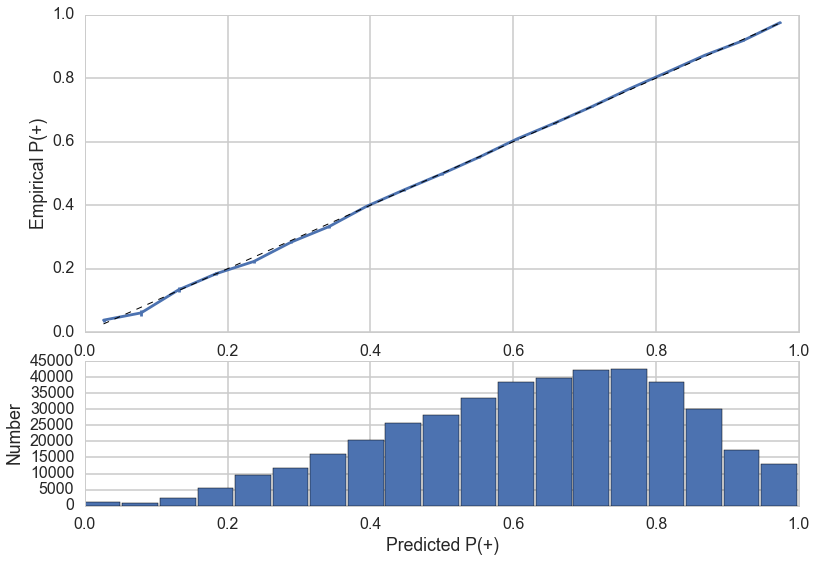

In [33]:
#Observe log-loss, accuracy and calibration of calibrated model
score=logloss(y_stack_tr, GBT_prob_cal)
print "Log-loss of calibrated model: %0.2f" %(score)
print "Accuracy score of calibrated model: %0.2f" %(accuracy_from_probs(GBT_prob_cal, y_stack_tr, 
                                                                        cutoff=0.5))
calibration_plot(GBT_prob_cal, y_stack_tr)

Both the log loss and accuracy were significantly improved through the calibration process. As this is the final individual model in the analysis, we now move on to the implementation of the logistic regression stacked ensemble.

## 4.5 ENSEMBLE

As performed in the winning model of the Netflix prize competition, we too will combine multiple independent models into one ensemble model. Although the process of training and testing multiple models is a computationally expensive exercise, the **ensembling process often yields better results**. In this section, we perform an unregularized logistic regression where the training data is the predicted posterior probabilities from the calibrated random forest, regularized logistic regression, and gradient boosted trees classifers. 

Typically, creating an **ensemble of uncorrelated models generalize better** to new data than when the models are correlated. Below we calculate the correlation between the predicted probabilities from the three models.

### 4.5.1 MODEL CORRELATIONS

In [46]:
from scipy.stats.stats import pearsonr
correlations=[]
cols=list(val_predictions.columns)
cols.remove('y')
compare=cols
for col in cols:
    compare=compare[1:]
    if compare:
        for i in compare:
            r=pearsonr(val_predictions[col], val_predictions[i])[0]
            correlations.append(dict(clf1=col,clf2=i,corr=r, abscorr=np.abs(r)))
corrs=pd.DataFrame(correlations)
corrs=corrs[['clf1', 'clf2', 'corr', 'abscorr']]
corrs.head()


,clf1,clf2,corr,abscorr
0,GBT,RF,0.905617,0.905617
1,GBT,LR,0.870652,0.870652
2,RF,LR,0.804602,0.804602


Although the models are not perfectly correlated, the **correlation between the models is strong**. As an exercise of comparison of the models, the following output of the 10 lowest predicted probabilities from the random forest model gives an idea of the similarities and differences between the models.

In [138]:
val_predictions[['RF','LR','GBT','y']].sort(columns='RF', ascending=True).head(10)

,RF,LR,GBT,y
317855,0.007094,0.191528,0.201403,0
100293,0.007094,0.502329,0.121592,0
335157,0.007094,0.488413,0.117256,0
218264,0.007094,0.189212,0.195833,0
218175,0.007094,0.474642,0.136133,0
218106,0.007094,0.523714,0.092741,0
185115,0.007094,0.236808,0.162682,0
241645,0.007094,0.431548,0.156900,0
362449,0.007094,0.220563,0.206576,0
239515,0.007094,0.804312,0.084388,0


### 4.5.2 TRAINING

The training data for the stacked logistic regression are the predicted probabilities on the validation set from the three models which were stored in the `val_predictions` dataframe. Since the logistic regression is **unregularized** we set the `C` value to an arbitrarily large number (in this case 10000) which removes the effect of the regularization.

In [140]:
from sklearn.linear_model import LogisticRegression
#create logistic regression instance
#Make C arbitrarily large to create unregularized fit
clf_ensemble=LogisticRegression(penalty='l2', C=10000, random_state=50)

#fit model using validation data
clf_ensemble.fit(val_predictions[['RF', 'LR', 'GBT']].values, val_predictions['y'].values)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### VARIABLE IMPORTANCES

In [143]:
ens_variable_importances=nonzero_coeff(clf_ensemble, ['RF', 'LR', 'GBT'])
ens_variable_importances.set_index("Feature", inplace=True)
ens_variable_importances

,abscoef,coef
Feature,,
GBT,4.508070,4.508070
RF,1.294563,1.294563
LR,0.630434,-0.630434


Observing the magnitude of the coefficients from the logistic regression, the GBT model is by far the greatest. This could have been expected as the GBT model performed better before and after calibration than the other two models.

### 4.5.3 PERFORMANCE

The fitted model is then tested using the predictions from the three models on the test set as the features (from the `test_predictions` dataframe).

Log-loss of calibrated model: -0.566
Accuracy score of calibrated model: 0.704


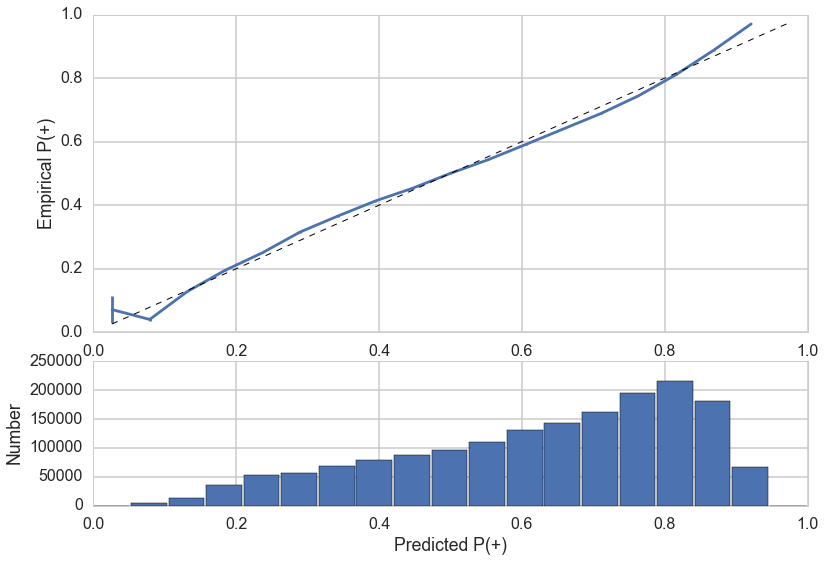

In [67]:
#Observe log-loss, accuracy and calibration of fitted model
score=logloss(ytest, prob_ensemb_cal)
print "Log-loss of calibrated model: %0.3f" %(score)
print "Accuracy score of calibrated model: %0.3f" %(accuracy_from_probs(prob_ensemb_cal, ytest, 
                                                                        cutoff=0.5))
calibration_plot(prob_ensemb_cal, ytest)

The final ensemble model is **well calibrated** and with a final log-loss and accuracy scores that are very similar to those from the GBT model. The ensemble model is a **significant improvement upon the baseline 63% model** as it yields a higher accuracy and gives a personalized prediction for each individual.

In [117]:
test_predictions['ENSEMBLE']=prob_ensemb_cal

In [119]:
test_predictions[['GBT_CAL', 'LR_CAL', 'RF_CAL', 'ENSEMBLE', 'y']].head(10)

,GBT_CAL,LR_CAL,RF_CAL,ENSEMBLE,y
0,0.771194,0.708939,0.767892,0.797899,1
1,0.687368,0.739922,0.752608,0.722321,1
2,0.121828,0.160382,0.368519,0.151183,0
3,0.747603,0.735622,0.681002,0.757231,1
4,0.678914,0.717794,0.481748,0.641342,1
5,0.818621,0.793602,0.831967,0.834325,1
6,0.734972,0.802196,0.716131,0.747273,0
7,0.829168,0.825350,0.682432,0.810082,1
8,0.815933,0.816716,0.799789,0.824661,1
9,0.939889,0.813660,0.845190,0.897316,1


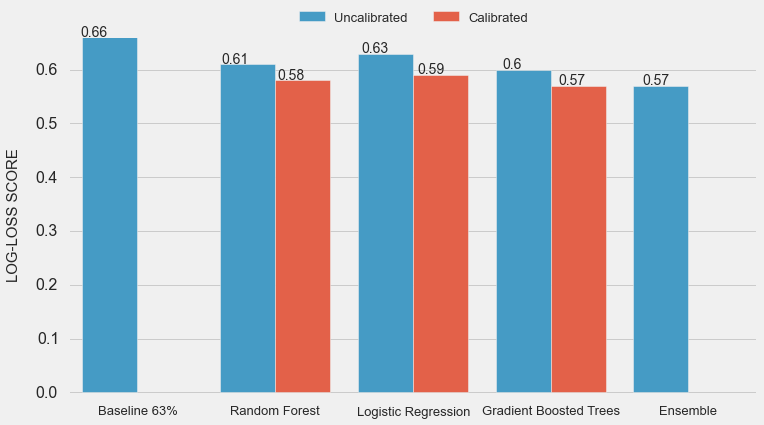

In [33]:
#Manually create dataframe from above results
models=['Baseline 63%', 'Random Forest', 'Random Forest', 'Logistic Regression', 'Logistic Regression',
       'Gradient Boosted Trees', 'Gradient Boosted Trees', 'Ensemble']
LL=[0.66, 0.61, 0.58, 0.63, 0.59, 0.60, 0.57, 0.57]
ACC=[0.63, 0.66, 0.69, 0.65, 0.68, 0.67, 0.70, 0.70]
Calibration=['Uncalibrated', 'Uncalibrated', 'Calibrated', 'Uncalibrated', 'Calibrated', 'Uncalibrated', 'Calibrated',
            'Uncalibrated']
results=pd.DataFrame({'Model': models, "Log-Loss Score": LL, "Accuracy Score":ACC, 'Calibrated':Calibration})

with plt.style.context(('fivethirtyeight')):
    #use 'five thirty eight' plot style
        
    plt.figure(figsize=(11,6))
    ax=sns.barplot(x='Model', y="Log-Loss Score", hue="Calibrated", data=results)
    
    #annotate value above bar
    #http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.005))

    ax.set_xticklabels(results.Model.unique(), fontsize=13)
    L=ax.legend(loc='upper center', ncol=2, fontsize=13, bbox_to_anchor=(0.5, 1.1))
    ax.set_xlabel("", fontsize=15, labelpad=15)
    ax.set_ylabel("LOG-LOSS SCORE", fontsize=15, labelpad=15)
    plt.margins(0.005)
    plt.show();

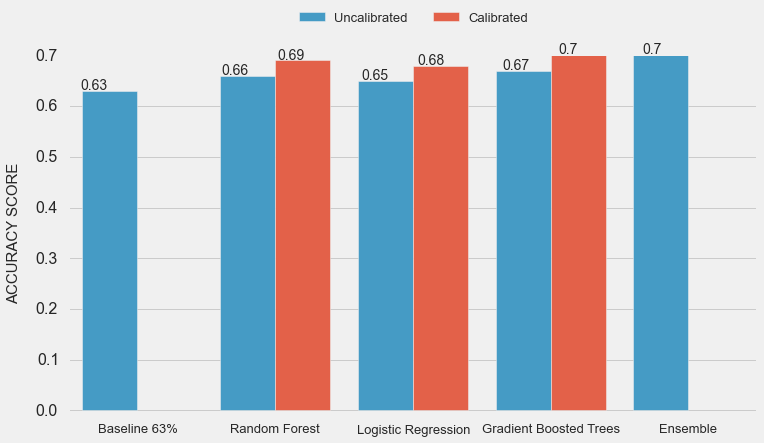

In [35]:
with plt.style.context(('fivethirtyeight')):
    #use 'five thirty eight' plot style

    plt.figure(figsize=(11,6))
    ax=sns.barplot(x='Model', y="Accuracy Score", hue="Calibrated", data=results)
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.005))

    ax.set_xticklabels(results.Model.unique(), fontsize=13)
    L=ax.legend(loc='upper center', ncol=2, fontsize=13, bbox_to_anchor=(0.5, 1.15))
    ax.set_xlabel("", fontsize=15, labelpad=15)
    ax.set_ylabel("ACCURACY SCORE", fontsize=15, labelpad=15)
    plt.margins(0.005)
    plt.show();

# 5. CONCLUSIONS AND FURTHER RESEARCH

**REEVALUATING ASSUMPTIONS**

A crucial assumption made that could have affected model performance was to group transferred participants together with participants who completed treatment. Although they are both 'positive' conclusions to treatment, they are quite different results. Model performance could be improved through further investigation of the causes for transferring participants and possibly implementing a ternary response variable (*completed, transferred, not completed*). 

**MODEL IMPROVEMENT**

As expected, the tree based models performed very well on this dataset. Since the models were trained on such a large quantity of data and had very similar performance, it is likely that the main way to improve performance is not to implement more complex models, but to focus more energy on feature engineering.

**MORE FEATURE ENGINEERING**

Although there was a significant improvement upon the baseline models, the overall model still struggles with the outcome prediction for some individuals. There are many other factors that can contribute to treatment completion. Including data relating to family ties (contact with parents, having brothers and sisters) could help improve the model. As to protect the anonymity of the treatment providers, the dataset provided limited information about details from the treatment program. Data relating to treatment program affiliation (private, public, faith based) as well as program details such as amount of time in contact with health professionals and psychiatric care could also increase the accuracy of the model.